# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader, DataMultiverse
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date, WidgetCheckbox

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'SEQ',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('SEQ')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250707.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
261240    0.004209
329750    0.004209
440650    0.004209
Name: buy, dtype: float64

# Universe

In [15]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR, UV_MCR


In [16]:
WidgetUniverse

## K200

In [14]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-07-15 uploaded.
Price data loaded


In [15]:
#k200.portfolio_data
#k200.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
)
k200.download(**kw) if WidgetUniverse['Download'] else None

... done
200 securities from 2022-01-03 to 2025-07-16 downloaded.
kospi200_prices_250716.csv saved
Execution time of download: 24 secs


## WTR

In [47]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-07-15 uploaded.
Price data loaded


In [48]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [49]:
#PM.review_universe('UV_WTR')

In [50]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse['Download'] else None

... done
6 securities from 2022-01-03 to 2025-07-16 downloaded.
etfs_weather_250716.csv saved
Execution time of download: 1 secs


In [51]:
#wtr.save()

## ETF

In [52]:
tickers = [
    '261240', '292560'
]

In [53]:
etf = PM.create_universe('UV_ETF')

2 securities from 2016-12-27 to 2025-07-15 uploaded.
Price data loaded


In [54]:
etf.get_names('selected')

0) 292560: TIGER 일본엔선물
1) 261240: KODEX 미국달러선물

In [55]:
#PM.review_universe('UV_WTR')

In [56]:
kw = dict(
    #n_years=3, 
    n_years=10, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    tickers = tickers
    #tickers = 'selected'
)
etf.download(**kw) if WidgetUniverse['Download'] else None

... done
2 securities from 2016-12-27 to 2025-07-16 downloaded.
etfs_all_250716.csv saved
Execution time of download: 0 secs


## FUND

In [17]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

40 securities from 2023-03-29 to 2025-07-15 uploaded.
Master data for 329 funds loaded.
Price data loaded


In [18]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None
len(tickers)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


28

In [19]:
# FISA
tickers += ['K55105CH3411', 'K55223BU8809', 'K55105BU7648', 'K55301BX0493', 'K55235CI9634',
            'K55306BT9453', 'K55236BG3001', 'K55101E95114', 'K55101E95247', 'K55235B96163', 'KR5235AK9691', 'K55236BG3274']
tickers += ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161']
tickers += ['K55301BU6139',  'K55365BT3694',  'KR5101888398', 'KR5370AP9956', 'K55234DF3150', 'K55213C50702', 'K55107BU0252',
 'K55206C11278', 'K55214B30803', 'K55306BT9453', 'KR5235AK9691', 'K55105BU7648', 'K55105CH3411', 'K55223BU8809', 'K55301BX0493',
 'K55301CC8789', 'K55101BV9571', 'K55214CD4825', 'K55107BB0404', 'KR5370AP9949', 'K55235CI9634', 'K55105BV6805', 'K55234BX9892',
 'K55364BU0797', 'KR5236267161', 'KR5363AC3714']
tickers = list(set(tickers))
len(tickers)

42

In [20]:
kw = dict(
    start_date = '2024-06-01',
    #n_years = 10,
    #close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'], backup_path = 'del',
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 329 funds loaded.
42 tickers set to download


100%|███████████████████████████████████████████████████████████████| 42/42 [01:30<00:00,  2.16s/it]

2 tickers failed for conversion
... done
40 securities from 2023-03-29 to 2025-07-16 downloaded.
funds_prices_250716.csv saved
Execution time of download: 91 secs


In [21]:
#_ = fund.save()

In [24]:
#fund.portfolio_data['universe']

### Master

In [122]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55364BU0797,에셋플러스코리아리치투게더퇴직연금증권자투자신탁 1[주식]종류Ce,기업은행,퇴직연금,에셋플러스,주식,주식,국내
K55105BV6805,삼성퇴직연금액티브증권자투자신탁 1[주식]Ce,기업은행,퇴직연금,삼성,주식,주식,국내
K55234BX9892,IBK퇴직연금한국대표증권자투자신탁[주식]종류C-e,기업은행,퇴직연금,IBK,주식,주식,국내
KR5363AC3714,트러스톤장기성장퇴직연금증권자투자신탁[주식]Ce클래스,기업은행,퇴직연금,트러스톤,주식,주식,국내
KR5236267161,한국밸류10년투자퇴직연금증권자투자신탁 1(주식)(C-E),기업은행,퇴직연금,한국밸류,주식,주식,국내


In [123]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [130]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [131]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

5

In [132]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [133]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.67it/s]


4.1 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.14it/s]

0.5 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250707.csv saved


### Monthly

In [4]:
fund = PM.create_universe('UV_FNDM')

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [6]:
fund.cleanup(dry_run=False)

3 files before 'fundm_prices_250130.csv' deleted


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse['Closed'],
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250620.csv loaded
33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded
Master data for 329 funds loaded.
Cost data transaction_cost_250620.csv loaded
Cost data saved to transaction_cost_250707.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [7]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

40 securities from 2023-03-29 to 2025-07-08 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [8]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']
#tickers = ['K55105CH3411']

In [9]:
fund.get_names(tickers)

0) K55364CF7048: 에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e
1) K55213C50702: 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)
2) K55101BV9571: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)

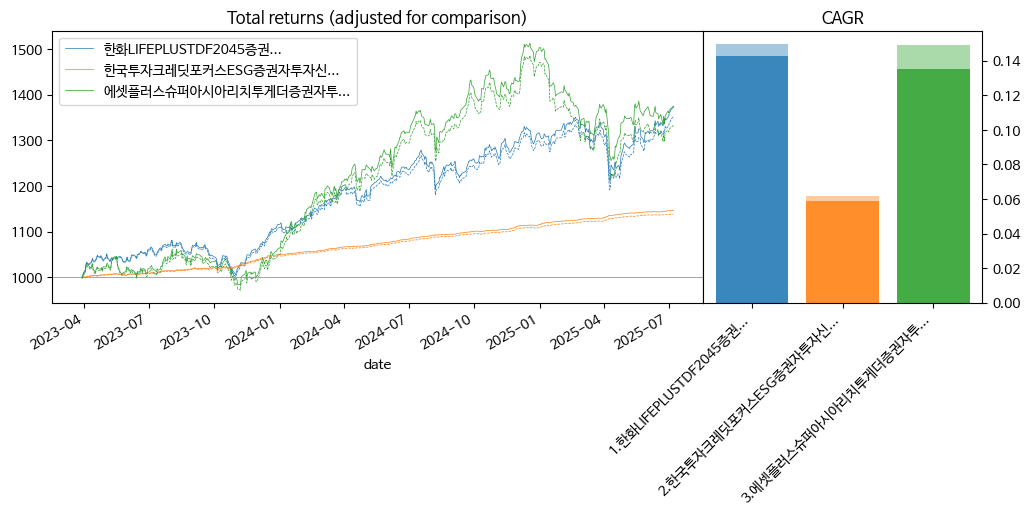

In [10]:
fund.plot(tickers, cost=cost, base=1000)

In [11]:
fund.performance(tickers, metrics=METRICS, sort_by='cagr')

,K55213C50702,K55364CF7048,K55101BV9571
start,2023-03-29,2023-03-29,2023-03-29
end,2025-07-08,2025-07-08,2025-07-08
total_return,0.374674,0.37313,0.145946
cagr,0.149926,0.149359,0.06163
calmar,1.440074,0.876721,12.284143
max_drawdown,-0.10411,-0.170361,-0.005017
avg_drawdown,-0.013521,-0.020082,-0.000609
avg_drawdown_days,17.384615,22.125,3.905263
daily_vol,0.091183,0.116828,0.009993
daily_sharpe,1.630663,1.29118,6.195889


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse['Download'] else None

## FCTR

In [12]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2022-01-03 to 2025-03-25 uploaded.
ERROR: Failed to get ticker names as Too Many Requests. Rate limited. Try after a while.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse['Download'] else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## LIQ

In [6]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [7]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded


In [10]:
liq.cleanup(dry_run=False)

58 files before 'krx_liq_prices_250521.csv' deleted


In [17]:
#liq.get_names()

In [19]:
kw = dict(
    n_years = 3, 
    tickers = selected, #selected,
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse['Download'] else None

ERROR: Failed to get ticker names
Execution time of download: 11 secs


## Additional Data

### Cost

*Check missing cost data*

In [4]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [5]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250707.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


*Remove older cost files*

In [8]:
from pf_utils import DataManager
#dry_run = True
dry_run = False

DataManager.cleanup_files(file_cost, path_tran, dry_run=dry_run)

5 files before 'transaction_cost_250425.csv' deleted


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 loaded


In [7]:
start_fr = '2024-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse['Download']:
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse['Closed'],
        cleanup = WidgetUniverse['Cleanup'],
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:30<00:00,  2.25s/it]

7.5 mins elapsed, 16.0 secs paused (3.5%)
Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 downloaded
kospi200_ratios_250709.csv saved
18 files before 'kospi200_ratios_250425.csv' deleted


In [8]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [9]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Ratio: 2024-01-02 ~ 2025-07-09
Price: 2022-01-03 ~ 2025-07-10


# Performance

In [122]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [123]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250716.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241112.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per2_250512.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [124]:
pfs = {
    'SRT': ['pf_srt_static', 'UV_WTR'], 
    'SDS': ['pf_sds_static', 'UV_K200'], 
    'FXM': ['pf_fxm_static', 'UV_ETF']
}
for p, (f, u) in pfs.items():
    pfs[p] = PM.create_portfolio(p, file=f, universe=u, strategy='SEQ', path=path_tran, **kw_cost)

6 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250715.csv loaded
200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250715.csv loaded
2 securities from 2016-12-27 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [125]:
#pm.load('LIQ')
#pm.load(pf_srt, pf_sds, pf_fxm)
pm.load(*pfs.values())

SRT: imported
SDS: imported
FXM: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


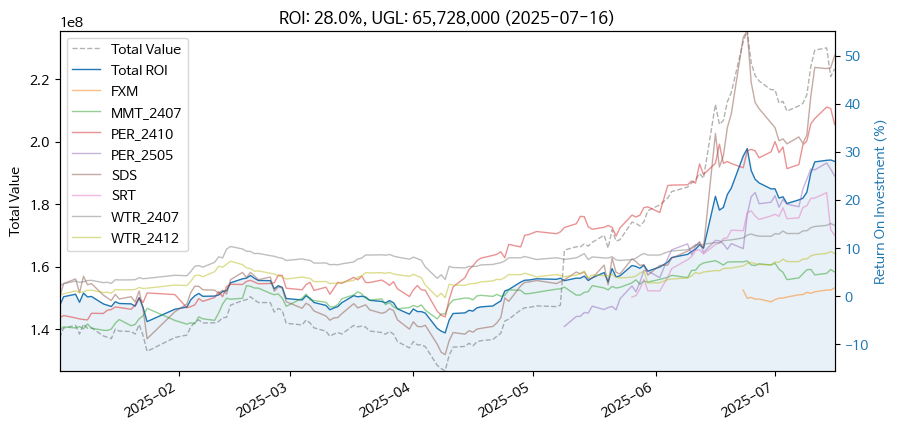

In [126]:
start_date='2025-01-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [27]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [28]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,FXM,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL
start,2025-06-23,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18
end,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16
buy,"998,598","77,789,717","16,472,520","17,985,321","97,106,466","3,449,435","10,364,836","10,516,562","234,683,455"
sell,0.0,"62,583,408","2,617,050",0.0,"11,015,733",0.0,"942,797",0.0,"77,158,988"
value,"1,002,939","19,123,216","19,743,905","23,696,969","134,626,511","3,887,314","10,945,761","11,449,601","224,476,216"
ugl,"4,341","3,916,907","5,888,435","5,711,648","48,535,778","437,879","1,523,723","933,039","66,951,749"
roi,0.00435,0.0504,0.357,0.318,0.5,0.127,0.147,0.0887,0.285


In [128]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,FXM,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL
start,2025-06-23,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18
end,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16
buy,"998,598","77,796,016","16,472,520","17,985,251","97,106,466","3,449,435","10,364,836","10,516,562","234,689,685"
sell,0.0,"62,583,405","2,617,050",0.0,"11,015,733",0.0,"942,797",0.0,"77,158,985"
value,"1,015,768","19,123,216","19,733,924","22,476,769","134,626,511","3,887,314","10,945,761","11,449,601","223,258,864"
ugl,"17,170","3,910,604","5,878,454","4,491,518","48,535,778","437,879","1,523,723","933,039","65,728,164"
roi,0.0172,0.0503,0.357,0.25,0.5,0.127,0.147,0.0887,0.28


In [30]:
pm.performance_stats(sort_by='yearly_sharpe', simulation=True)

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe
Returning Simulated performance using the most recent transaction weights:


,WTR_2407,WTR_2412,PER_2410,MMT_2407,PER_2505,SRT,SDS,FXM
start,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2016-12-27
end,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16
total_return,0.31835,0.3353,0.762363,4.966111,0.39945,0.175002,0.197444,0.386454
cagr,0.081398,0.085316,0.17403,0.658169,0.099832,0.04672,0.052343,0.038955
calmar,0.694687,0.758586,0.607019,2.081457,0.341513,0.16709,0.144278,0.197337
max_drawdown,-0.117172,-0.112467,-0.286697,-0.316206,-0.292323,-0.279612,-0.362791,-0.197402
avg_drawdown,-0.01339,-0.013202,-0.047118,-0.061707,-0.064547,-0.052335,-0.138633,-0.03211
avg_drawdown_days,34.764706,34.558824,33.388889,29.725,73.470588,114.454545,212.5,121.36
monthly_vol,0.076902,0.075383,0.203254,0.400892,0.20869,0.198886,0.285264,0.086824
monthly_sharpe,1.238247,1.306213,0.987428,1.623478,0.667242,0.467665,0.420581,0.479804


Custom category loaded: portfolio2


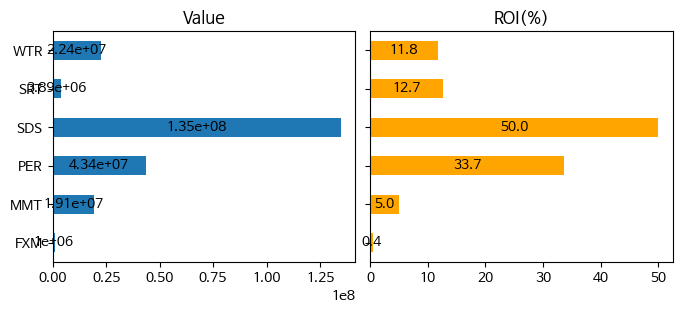

In [31]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*diversification metrics*

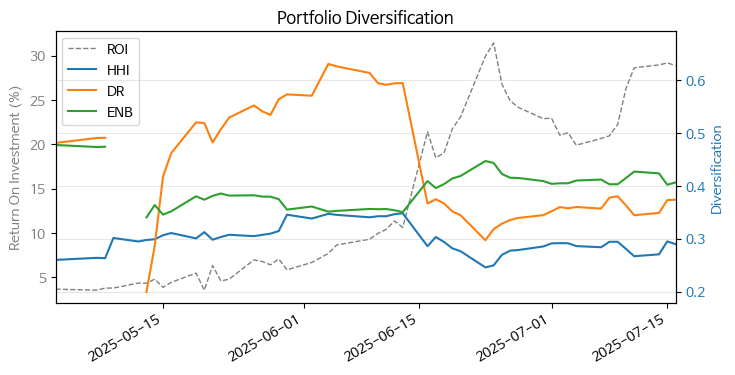

In [32]:
pfs = ['MMT', 'PER', 'WTR', 'SDS']
pm.diversification_history(*pfs, start_date='2025-05-01')

*print summary for google sheet 금융자산운용*

In [ ]:
pm.util_print_summary(date=w_date.value)

### All Funds

In [33]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


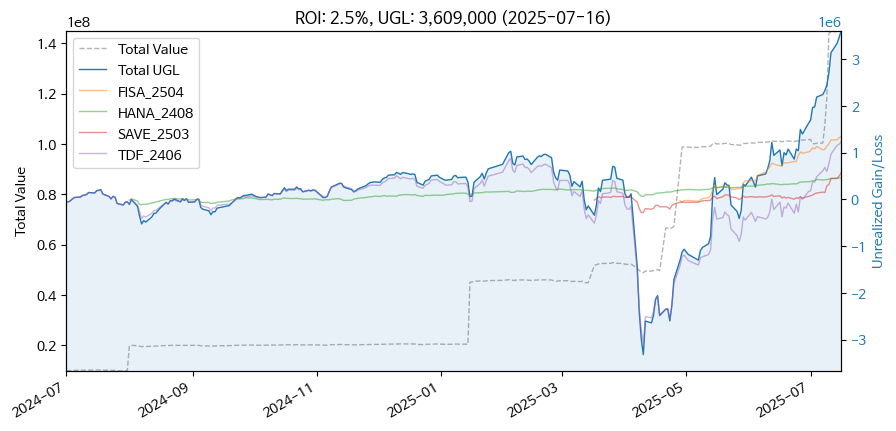

In [34]:
start_date='2024-07-01'
pm.plot(start_date=start_date, roi=False)

In [35]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-07-16,2025-07-16,2025-07-16,2025-07-16,2025-07-16
buy,"31,176,035","9,990,000","22,649,487","79,392,555","143,208,077"
sell,"-14,161",0.0,"1,975,860","-170,202","1,791,497"
value,"32,530,908","10,452,045","21,244,767","80,798,256","145,025,976"
ugl,"1,340,712","462,045","571,140","1,235,499","3,609,396"
roi,0.043,0.0463,0.0252,0.0156,0.0252


In [38]:
pm.performance_stats(sort_by='yearly_sharpe', simulation=True)

Returning Simulated performance using the most recent transaction weights:


,FISA_2504,HANA_2408,SAVE_2503,TDF_2406
start,2023-03-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-16,2025-07-16,2025-07-16,2025-07-16
total_return,0.249186,0.173132,0.33296,0.357181
cagr,0.101579,0.071898,0.133113,0.14202
calmar,2.829189,3.986269,1.696629,1.964899
max_drawdown,-0.035904,-0.018036,-0.078457,-0.072279
avg_drawdown,-0.003768,-0.002376,-0.010023,-0.007722
avg_drawdown_days,10.423729,9.803279,16.761905,11.293103
monthly_vol,0.034728,0.024641,0.070757,0.052948
monthly_sharpe,2.726763,2.759324,1.739733,2.458727


In [98]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
category = 'asset'

Custom category loaded: account, asset, manager, region, seller, strategy


In [64]:
file = 'funds_custom_category_250711b.csv'

# uncomment to save all tickers and their names in custom category file
#df = pm.util_performance_by_asset()
#df['name'].rename('name2').drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)
category = 'name2'

Custom category loaded: name2


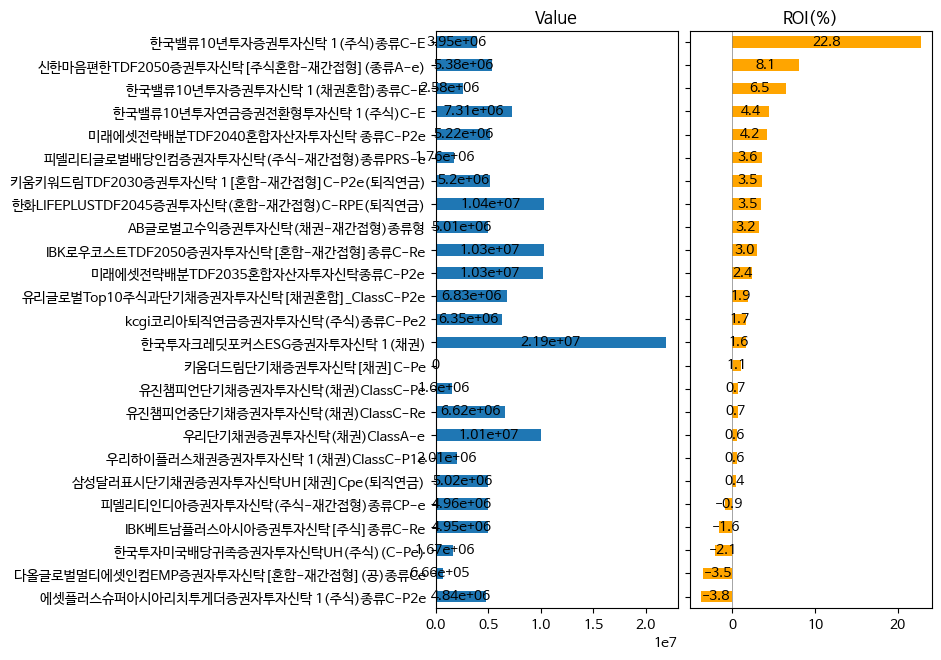

In [65]:
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

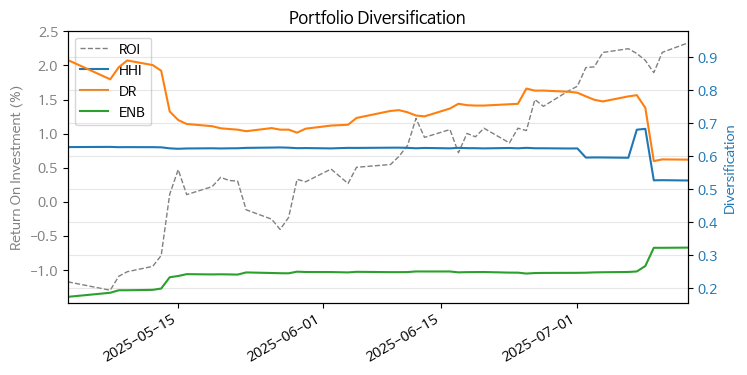

In [27]:
pm.diversification_history(start_date='2025-05-01')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Research

## Search

In [16]:
#universe = 'UV_FUND'
#universe = 'UV_K200'
universe = 'UV_ETF'
dm = DataMultiverse(universe)

UV_ETF:
2 securities from 2016-12-27 to 2025-07-15 uploaded.
Price data loaded



In [47]:
dm.get_names(search='금융')

0) 494900(etf): TIGER 25-12 금융채(AA-이상)
1) 498410(etf): KODEX 금융고배당TOP10타겟위클리커버드콜
2) 463290(etf): 1Q 단기금융채액티브
3) 484880(etf): SOL 금융지주플러스고배당
4) 453650(etf): KODEX 미국S&P500금융
5) 336160(etf): RISE 금융채액티브
6) 139270(etf): TIGER 200 금융
7) 498860(etf): RISE 코리아금융고배당
8) 0028X0(etf): KODEX 미국금융테크액티브
9) 284980(etf): RISE 200금융

## Data

In [7]:
n_years = 20

In [8]:
cb = WidgetCheckbox('Download', 'Append', as_accessor=True)
cb

### ETF

In [54]:
file = 'research_etf'
universe = 'UV_ETF'
retf = PM.create_universe(universe, file=file)
cetf = PM.get_cost(universe, file=file_cost, path=path_tran)

4 securities from 2013-04-25 to 2025-07-14 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [48]:
tickers = ['498400', '498410', '069500', '498860']
retf.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

... done
4 securities from 2013-04-25 to 2025-07-14 downloaded.
research_etf_250714.csv saved
Execution time of download: 1 secs


### FUND

In [85]:
file = 'research_fund'
universe = 'UV_FUND'
rfnd = PM.create_universe(universe, file=file)
cfnd = PM.get_cost(universe, file=file_cost, path=path_tran)

34 securities from 2008-11-17 to 2025-07-10 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [82]:
#tickers = ['K55301BU6253', 'K55206C95800', 'K55210CO3737']
tickers = ['K55210BR6613', 'K55210BR6654', 'K55210BR6480', 'K55210BR6522', 'K55210CO3737', 'K55210CO3760']

rfnd.get_names(tickers)

0) K55210CO3737: 신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)
1) K55210CO3760: 신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-e)
2) K55210BR6480: 신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e)
3) K55210BR6522: 신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e)
4) K55210BR6613: 신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류A-e)
5) K55210BR6654: 신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-e)

In [ ]:
tickers = rfnd.get_names('selected')
tickers = list(tickers.keys())

In [73]:
len(tickers)

4

In [83]:
rfnd.download(tickers=tickers, n_years=n_years, overwrite=True, append=cb['Append']) if cb['Download'] else None

Master data for 329 funds loaded.
Update existing data with 1 tickers
1 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.08s/it]

... done
34 securities from 2008-11-17 to 2025-07-10 downloaded.
research_fund_250710.csv saved
Execution time of download: 3 secs


### MACRO

In [16]:
file = 'research_macro'
universe = 'UV_MCR'
rmcr = PM.create_universe(universe, file=file)

2 securities from 2004-12-31 to 2025-07-02 uploaded.
Price data loaded


In [40]:
tickers=['USD/KRW', '^NYICDX']
rmacro.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

## Compare

In [ ]:
univ = ['ETF', 'FUND', 'MCR']
inst = [retf, rfnd, rmcr]
cost = [cetf, cfnd]
dm = DataMultiverse(*zip(univ, inst))
dm.set_cost(dict(zip(univ[:-1], cost)))

In [ ]:
dm = DataMultiverse(('fund', rfnd))
dm.set_cost({'fund':cfnd})

In [55]:
dm = DataMultiverse(('etf', retf))
dm.set_cost({'etf':cetf})

etf: imported
Cost of etf loaded


In [40]:
#tickers = ['K55306BT9453', 'K55301BX0493', 'KR5235AK9691', 'K55223BU8809', 'K55105BU7648', 'K55235CI9634']
#tickers = ['K55306BT9453', 'K55301BX0493'] # china
#tickers = ['KR5235AK9691', 'K55223BU8809'] # eu
#tickers = ['K55105BU7648', 'K55235CI9634'] # india
#tickers = ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161'] # korea
#tickers = ['K55107BB0404', 'KR5101888398']
tickers = ['498400', '498410', '069500']
#tickers = None

In [24]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
#tickers = pm.util_performance_by_asset(category='asset:채권').index
tickers = pm.util_performance_by_asset(category='strategy:TDF').index

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported
Custom category loaded: account, asset, manager, region, seller, strategy


In [56]:
#dm.get_names('selected')
dm.get_names(tickers)

0) 069500(etf): KODEX 200
1) 498400(etf): KODEX 200타겟위클리커버드콜
2) 498410(etf): KODEX 금융고배당TOP10타겟위클리커버드콜
3) 498860(etf): RISE 코리아금융고배당

In [57]:
# run to check missing tickers
#dm.get_prices(tickers)

In [58]:
dm.performance(tickers, sort_by='cagr:5')

,498860(etf),498410(etf),498400(etf),069500(etf)
start,2024-12-10,2024-12-17,2024-12-03,2013-04-25
end,2025-07-14,2025-07-14,2025-07-14,2025-07-14
total_return,0.667568,0.53689,0.260363,1.144233
cagr,1.374309,1.119231,0.460835,0.064415
calmar,12.452645,9.523982,3.549631,0.169123
max_drawdown,-0.110363,-0.117517,-0.129826,-0.38088
avg_drawdown,-0.020457,-0.018976,-0.021619,-0.035356
avg_drawdown_days,11.428571,11.692308,11.866667,76.464286
monthly_vol,0.237999,0.227553,0.168354,0.165212
monthly_sharpe,4.027014,3.493253,2.771936,0.455424


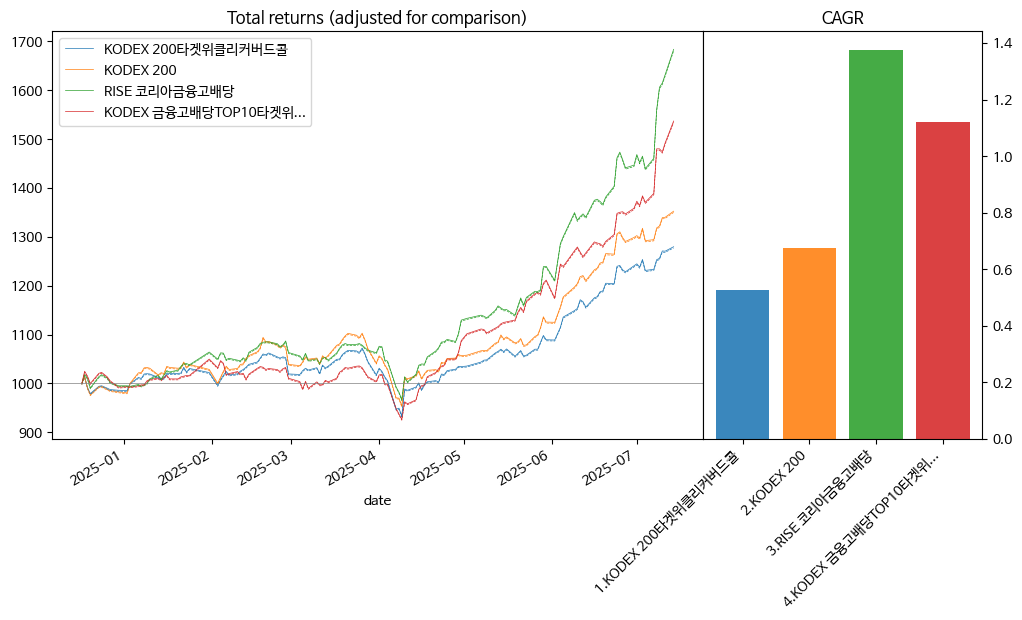

In [59]:
tkrs = tickers
#tkrs = ['K55210CO3737', 'K55210CO3760', 'K55210BR6613', 'K55210BR6654']
dm.plot(tkrs, base=1000, figsize=(12,6))

# Transaction

## MMT

In [97]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250716.csv loaded
ERROR: Run update_record first after editing record


In [98]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

Transaction file pf_k200_momentum_250716.csv updated
self.record updated


In [99]:
pf_mmt.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-07-16 000150         두산  590000           -6    0     0.0    0.000   
           000880         한화   93750            2   42     0.2    0.205   
           012450  한화에어로스페이스  854000            0    4     0.2    0.178   
           012630        HDC   21950          180  180     0.2    0.208   
           064350       현대로템  192500            0   20     0.2    0.201   
           329180    HD현대중공업  401500           -9    0     0.0    0.000   
           377300      카카오페이   65850           59   59     0.2    0.207   

                       date*  
date       ticker             
2025-07-16 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           012630 2025-07-17  
           064350 2025-07-17  
           329180 2025-07-17  
           377300 2025-07-17

*daily transactions for book keeping*

In [70]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

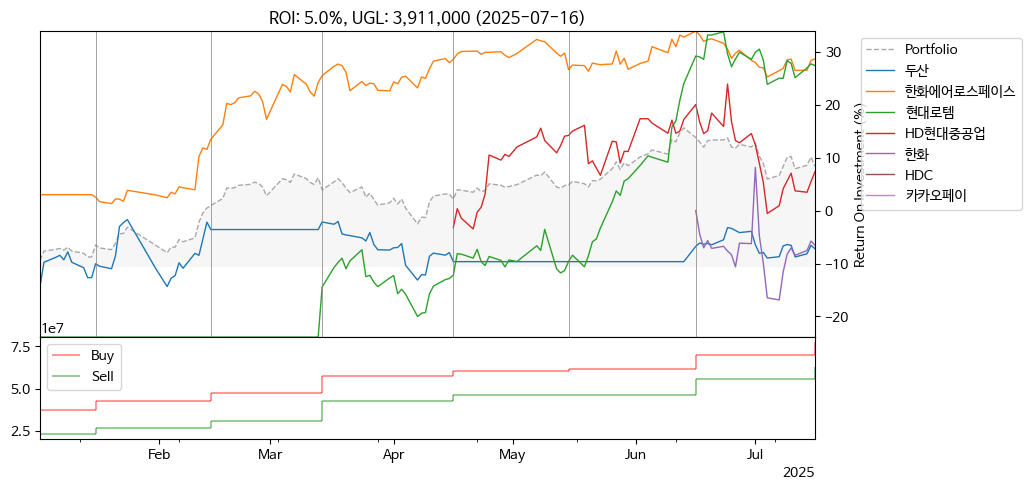

In [100]:
pf_mmt.plot(total=False, start_date='2025-01-01')

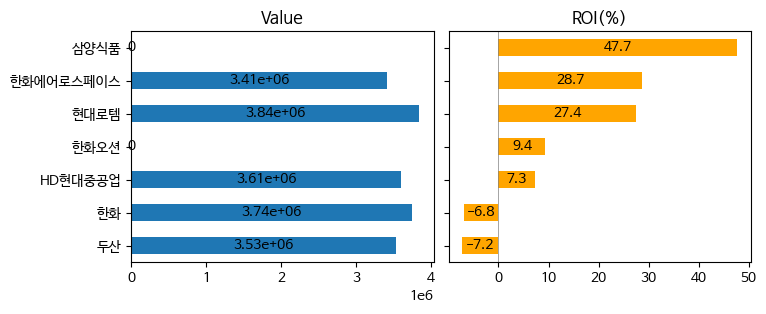

In [72]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

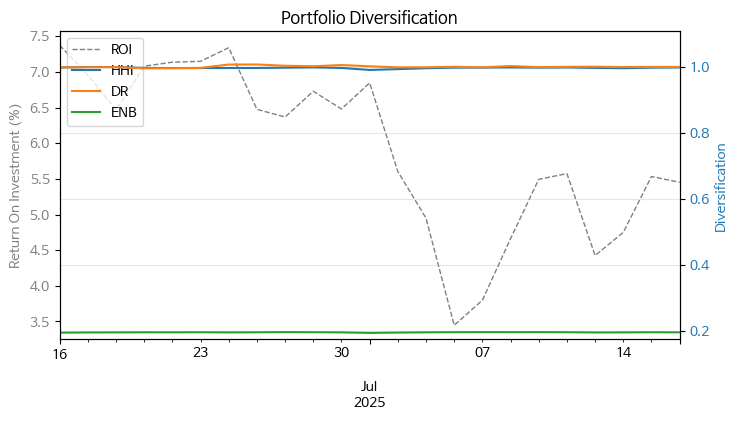

In [73]:
pf_mmt.diversification_history()

In [74]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-07-16, 69772660, 55443047, 18133474, 3803861, 0.0545


start    2024-07-22
end      2025-07-16
buy      69,772,660
sell     55,443,047
value    18,133,474
ugl       3,803,861
roi          0.0545
dtype: object

In [75]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kw = dict(
    #sell = {'000880': 2e6},
    date = WidgetTransaction[0],
    save = WidgetTransaction[2]
)
#_ = pf_mmt.transaction_halt(**kw) 

In [95]:
date_actual = '2025-07-17'
cleanup = False
capital = WidgetTransaction[1]
capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    cleanup = cleanup,
    date_actual=date_actual
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,816,750)
Mean absolute error of weights: 4 %
Deployed capital: 991,600
ROI: 4.9%, UGL: 3,789,165 (2025-07-16)
All transactions saved to pf_k200_momentum_250716.csv


In [96]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-06-16 000150         두산   598000            6    6     0.2    0.184   
           000880         한화   100400           40   40     0.2    0.206   
           003230       삼양식품  1277000           -3    0     0.0    0.000   
           012450  한화에어로스페이스   970000            0    4     0.2    0.199   
           042660       한화오션    85100          -42    0     0.0    0.000   
           064350       현대로템   198200          -10   20     0.2    0.204   
           329180    HD현대중공업   448000            1    9     0.2    0.207   
2025-07-16 000150         두산   590000           -6    0     0.0    0.000   
           000880         한화    93700            2   42     0.2    0.205   
           012450  한화에어로스페이스   854000            0    4     0.2    0.178   
           012630        HDC    22150          180  180     0.2    0.208   
           064350       현대로템   192500            0   20     0.2    0.201   
           329180    HD현대중공업   401500           -9    0     0.0    0.000   
           377300      카카오페이    67300           59   59     0.2    0.207   

                       date*  
date       ticker             
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17  
2025-07-16 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           012630 2025-07-17  
           064350 2025-07-17  
           329180 2025-07-17  
           377300 2025-07-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [110]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 loaded


In [116]:
#pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per2_250512.csv loaded
ERROR: Run update_record first after editing record


In [117]:
# run after editting record file
pf_per.update_record()

Transaction file pf_k200_per2_250512.csv updated
self.record updated


In [118]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-09 000210       DL   36075           24   24    0.05    0.048   
           000660   SK하이닉스  194750            4    4    0.05    0.045   
           001450     현대해상   22025           38   38    0.05    0.048   
           001740   SK네트웍스    4187          198  198    0.05    0.012   
           002710    TCC스틸   20350           41   41    0.05    0.048   
           003240     태광산업  851500            1    1    0.05    0.049   
           005250   녹십자홀딩스   13614           59   59    0.05    0.048   
           005830   DB손해보험   92050            9    9    0.05    0.048   
           006360     GS건설   18955           46   46    0.05    0.049   
           009240       한샘   42625           19   19    0.05    0.047   
           009970  영원무역홀딩스  100331            8    8    0.05    0.047   
           010060   OCI홀딩스   68250           12   12    0.05    0.048   
           015760     한국전력   21163          110  110     NaN    0.176   
           036460   한국가스공사   38125           21   21    0.05    0.047   
           047040     대우건설    3697          237  237    0.05    0.049   
           078930       GS   39225           21   21    0.05    0.048   
           088350     한화생명    2662          311  311    0.05    0.049   
           178920   PI첨단소재   17005           50   50    0.05    0.003   
           326030   SK바이오팜   87950            9    9    0.05    0.048   
           402340    SK스퀘어   94500            8    8    0.05    0.044   

                       date*  
date       ticker             
2025-05-09 000210 2025-05-12  
           000660 2025-05-12  
           001450 2025-05-12  
           001740 2025-05-12  
           002710 2025-05-12  
           003240 2025-05-12  
           005250 2025-05-12  
           005830 2025-05-12  
           006360 2025-05-12  
           009240 2025-05-12  
           009970 2025-05-12  
           010060 2025-05-12  
           015760 2025-05-12  
           036460 2025-05-12  
           047040 2025-05-12  
           078930 2025-05-12  
           088350 2025-05-12  
           178920 2025-05-12  
           326030 2025-05-12  
           402340 2025-05-12

In [119]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 001740, 178920 downloaded
Tickers 001740, 178920 added to universe
start, end, buy, sell, value, ugl, roi
2025-05-09, 2025-07-16, 17985251, 0.0, 22476779, 4491528, 0.25


start    2025-05-09
end      2025-07-16
buy      17,985,251
sell            0.0
value    22,476,779
ugl       4,491,528
roi            0.25
dtype: object

In [120]:
#pf_per.update_record()
#pf_per.view_record(-2)

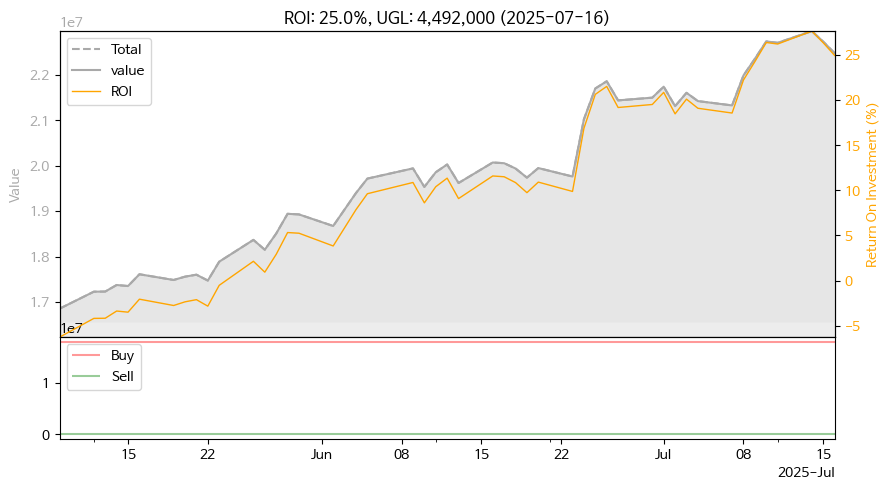

In [121]:
pf_per.plot()

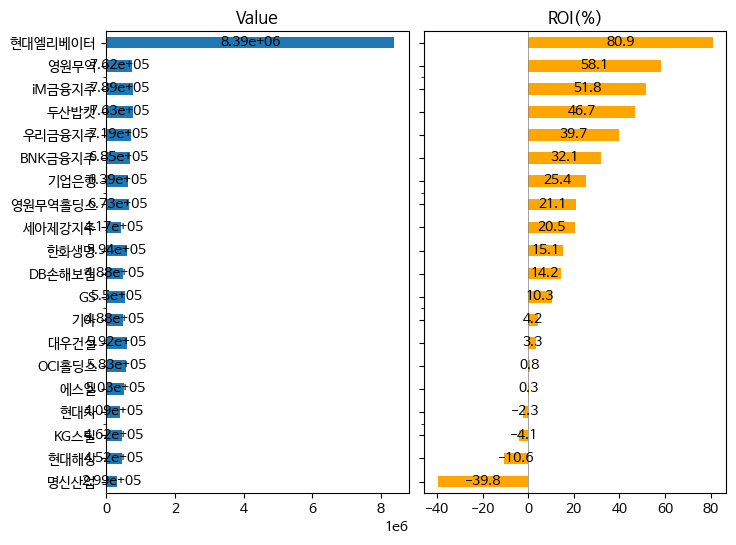

In [52]:
_ = pf_per.plot_assets(figsize=(8,6))

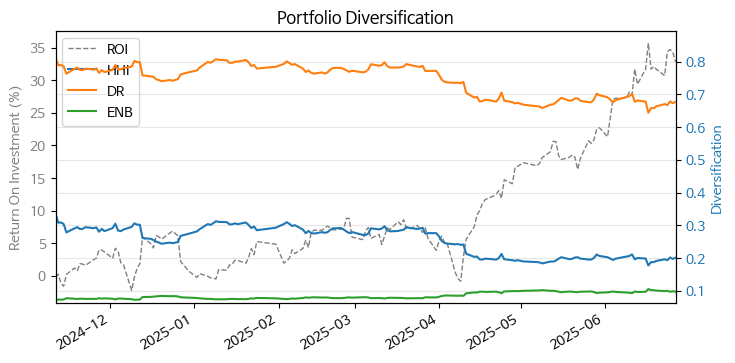

In [53]:
pf_per.diversification_history()

In [54]:
#_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [55]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
)
#_ = pf_per.transaction_halt(**kw) 

In [115]:
kw = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-12 to 2025-05-12
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 3 %
Tickers 001740, 178920 added to universe
Residual cash: 450,565
ROI: 28.4%, UGL: 5,884,978 (2025-07-16)
All transactions saved to pf_k200_per2_250512.csv


In [114]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-12 000210       DL   37250           -2   24    0.05    0.050   
           000660   SK하이닉스  195000            0    4    0.05    0.044   
           001450     현대해상   22050            2   41    0.05    0.051   
           001740   SK네트웍스    1008         -823    0    0.00    0.000   
           002710    TCC스틸   20450            3   45    0.05    0.052   
           003240     태광산업  855000            0    1    0.05    0.048   
           005250   녹십자홀딩스   13670            9   67    0.05    0.051   
           005830   DB손해보험   92300            0    9    0.05    0.047   
           006360     GS건설   18970           -1   48    0.05    0.051   
           007340  DN오토모티브   20700           44   44    0.05    0.051   
           009240       한샘   42850            2   21    0.05    0.051   
           009970  영원무역홀딩스  100800            1    9    0.05    0.051   
           010060   OCI홀딩스   68500            1   13    0.05    0.050   
           015760     한국전력   26900          -52   34    0.05    0.051   
           036460   한국가스공사   38100            3   24    0.05    0.051   
           047040     대우건설    3700           -4  248    0.05    0.052   
           071320   지역난방공사   55100           16   16    0.05    0.049   
           078930       GS   39350            2   23    0.05    0.051   
           088350     한화생명    2675           31  344    0.05    0.052   
           178920   PI첨단소재    1036         -820    0    0.00    0.000   
           326030   SK바이오팜   88500            1   10    0.05    0.050   
           402340    SK스퀘어   95200            1    9    0.05    0.048   

                       date*  
date       ticker             
2025-05-12 000210 2026-05-12  
           000660 2026-05-12  
           001450 2026-05-12  
           001740 2026-05-12  
           002710 2026-05-12  
           003240 2026-05-12  
           005250 2026-05-12  
           005830 2026-05-12  
           006360 2026-05-12  
           007340 2026-05-12  
           009240 2026-05-12  
           009970 2026-05-12  
           010060 2026-05-12  
           015760 2026-05-12  
           036460 2026-05-12  
           047040 2026-05-12  
           071320 2026-05-12  
           078930 2026-05-12  
           088350 2026-05-12  
           178920 2026-05-12  
           326030 2026-05-12  
           402340 2026-05-12

*New asset turnover*

In [17]:
pf_per.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-10-17,5.0,5.0,1.000
2024-11-11,15.0,20.0,0.750
2025-07-09,11.0,19.0,0.579


*Compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*Performance without old assets*

In [20]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

security_names updated
Data of tickers 009900, 016380 downloaded
Trading of assets 017800 to halt
Updated with transaction on 2025-07-10
Set save=True to save transaction record
ROI: 21.7%, UGL: 2,565,363 (2025-07-10)


start    2024-10-17
end      2025-07-10
buy      11,832,689
sell      2,617,050
value    11,781,002
ugl       2,565,363
roi           0.217
dtype: object

## WTR
*modified all weather*

In [143]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-12-12'

In [144]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250214.csv loaded
ERROR: Run update_record first after editing record


In [145]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

Transaction file pf_wtr_static_250214.csv updated
self.record updated


In [146]:
pf_wtr.view_record(-1, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   49  0.1667   
           148070         KIWOOM 국고채10년  115030            1   14  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.164 2025-02-14  
           148070    0.159 2025-02-14  
           273130    0.162 2025-02-14  
           284430    0.173 2025-02-14  
           379800    0.172 2025-02-14  
           411060    0.171 2025-02-14

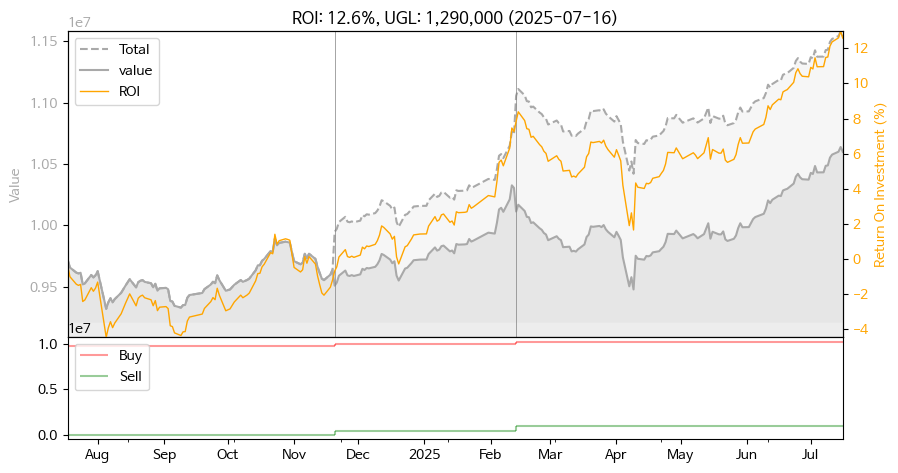

In [147]:
pf_wtr.plot(total=True)

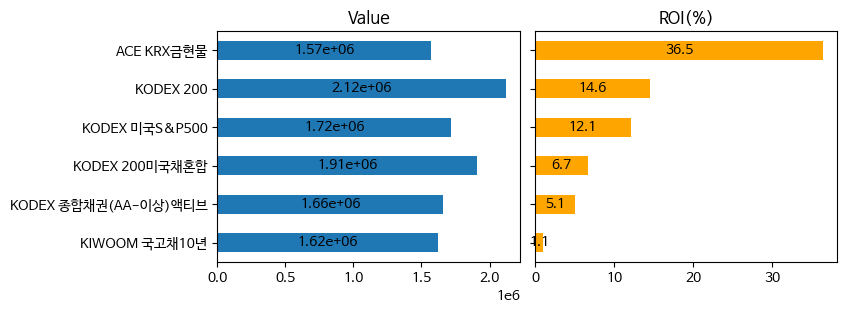

In [148]:
_ = pf_wtr.plot_assets(figsize=(8,3))

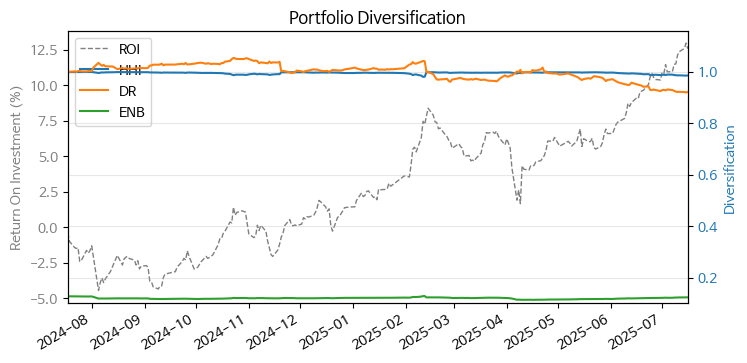

In [149]:
pf_wtr.diversification_history()

In [150]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-07-16, 10251579, 942797, 10598852, 1290071, 0.126


start    2024-07-18
end      2025-07-16
buy      10,251,579
sell        942,797
value    10,598,852
ugl       1,290,071
roi           0.126
dtype: object

In [137]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [138]:
#pf_wtr.performance_stats(metrics=METRICS)

In [139]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [142]:
capital = WidgetTransaction[1]
#capital = 0.8
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

6 tickers selected by Selected from 2025-02-14 to 2025-02-14
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 2 %
Residual cash: 193,843
ROI: 14.6%, UGL: 1,517,928 (2025-07-16)
All transactions saved to pf_wtr_static_250214.csv


In [141]:
pf_wtr.view_record(-1, nshares=False)

name  ratio  transaction      net  weight  \
date       ticker                                                              
2025-02-14 069500             KODEX 200    1.0       -33937  1730787  0.1667   
           148070         KIWOOM 국고채10년    1.0            0  1727550  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브    1.0            0  1641780  0.1667   
           284430        KODEX 200미국채혼합    1.0       -26180  1740970  0.1667   
           379800        KODEX 미국S&P500    1.0       -40246  1730578  0.1667   
           411060            ACE KRX금현물    1.0       -93480  1729380  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-14 069500    0.168 2025-08-14  
           148070    0.168 2025-08-14  
           273130    0.159 2025-08-14  
           284430    0.169 2025-08-14  
           379800    0.168 2025-08-14  
           411060    0.168 2025-08-14

In [39]:
pf_wtr.performance_stats(-2)

,Realized,Simulated (250213),Simulated (250714)
start,2024-07-19,2022-01-03,2022-01-03
end,2025-07-14,2025-02-13,2025-07-14
total_return,0.13123,0.318759,0.337496
cagr,0.133266,0.092954,0.08596
calmar,2.006517,0.861926,0.797031
max_drawdown,-0.066417,-0.107845,-0.10785
avg_drawdown,-0.011018,-0.012364,-0.013848
avg_drawdown_days,18.470588,38.333333,37.83871
monthly_vol,0.050655,0.08171,0.073008
monthly_sharpe,2.599438,1.312709,1.345175


In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [151]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='SEQ',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250715.csv loaded


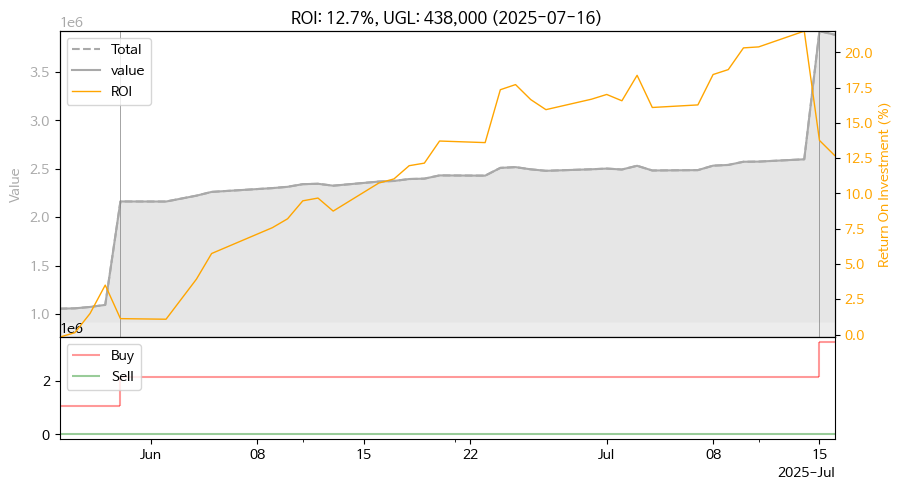

In [152]:
pf_srt.plot(total=True)

In [114]:
pf_srt.valuate(exclude_cost=True)

start    2025-05-26
end      2025-07-15
buy       3,449,580
sell            0.0
value     3,931,530
ugl         481,950
roi            0.14
dtype: object

In [61]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [109]:
kw = dict(
    buy = {'069500': 1310760}, 
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
)
_ = pf_srt.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-15
All transactions saved to pf_srt_static_250715.csv
ROI: 13.8%, UGL: 474,687 (2025-07-15)


In [115]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-30,069500,KODEX 200,36140,30,60,1.0,1.0,2025-06-02
2025-07-15,069500,KODEX 200,43710,30,90,1.0,1.0,2025-07-15


## SDS

In [165]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='SEQ',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-07-15 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250715.csv loaded
ERROR: Run update_record first after editing record


In [166]:
pf_sds.update_record()

Transaction file pf_sds_static_250715.csv updated
self.record updated


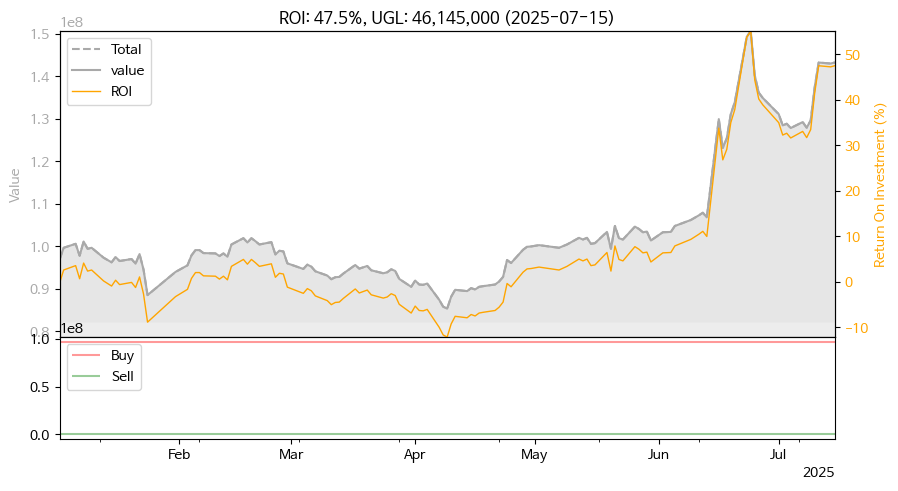

In [161]:
pf_sds.plot()

In [95]:
pf_sds.performance_stats()

,Realized,Simulated (250715)
start,2025-01-03,2022-01-03
end,2025-07-15,2025-07-15
total_return,0.437321,0.175719
cagr,0.986865,0.046938
calmar,6.064818,0.129382
max_drawdown,-0.16272,-0.362791
avg_drawdown,-0.057048,-0.138633
avg_drawdown_days,15.181818,212.333333
monthly_vol,0.42957,0.283507
monthly_sharpe,2.189862,0.402984


In [88]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [164]:
#capital = {'018260': 97110000} # = 780 * price on 2025-01-02
#capital = {'018260': -11036000}

kw = dict(
    capital = capital,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    nshares=True
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-07-15 to 2025-07-15
Weights of tickers determined by Equal weights.
Rebalancing with contribution 7% of the portfolio value (10,046,400)
Mean absolute error of weights: 0 %
Deployed capital: 9,936,000
ROI: 43.1%, UGL: 46,126,504 (2025-07-15)
All transactions saved to pf_sds_static_250715.csv


In [167]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-01-02,018260,삼성에스디에스,124500,780,780,1.0,1.0,2015-01-01
2025-07-15,018260,삼성에스디에스,183933,-60,720,1.0,1.0,2025-07-15


## FXM

In [61]:
kw = dict(
    file='pf_fxm_static', path=path_tran,
    universe='UV_ETF', strategy='SEQ',
    **kw_cost
)
pf_fxm = PM.create_portfolio('FXM', **kw)

2 securities from 2016-12-27 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [50]:
pf_fxm.update_record()

Transaction file pf_fxm_static_250623.csv updated
self.record updated


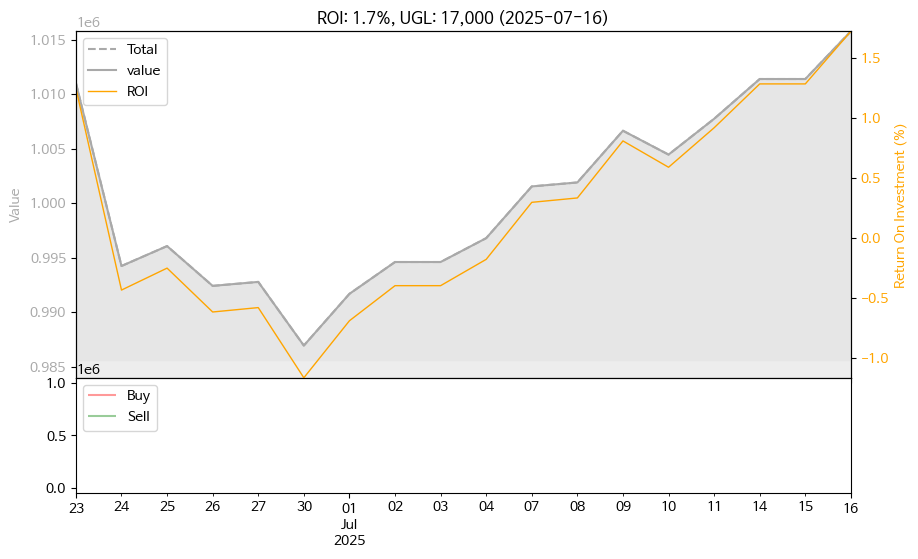

In [62]:
pf_fxm.plot()

In [42]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [64]:
#capital = WidgetTransaction[1]
capital = {'261240': 1e6}

kw = dict(
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    nshares = True
)
_ = pf_fxm.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-07-07 to 2025-07-07
Weights of tickers determined by Specified.
Rebalancing with contribution 1,000,000.0
Mean absolute error of weights: 0 %
Deployed capital: 988,200
ROI: 1.6%, UGL: 30,868 (2025-07-16)
All transactions saved to pf_fxm_static_250707.csv


In [65]:
pf_fxm.view_record(nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-23,261240,KODEX 미국달러선물,13680,73,73,1.0,1.0,2025-06-24
2025-07-07,261240,KODEX 미국달러선물,13725,72,145,1.0,1.0,2025-07-07


## LIQ

In [4]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_liq_static_250526.csv loaded


In [5]:
pf_liq.cleanup(dry_run=True)

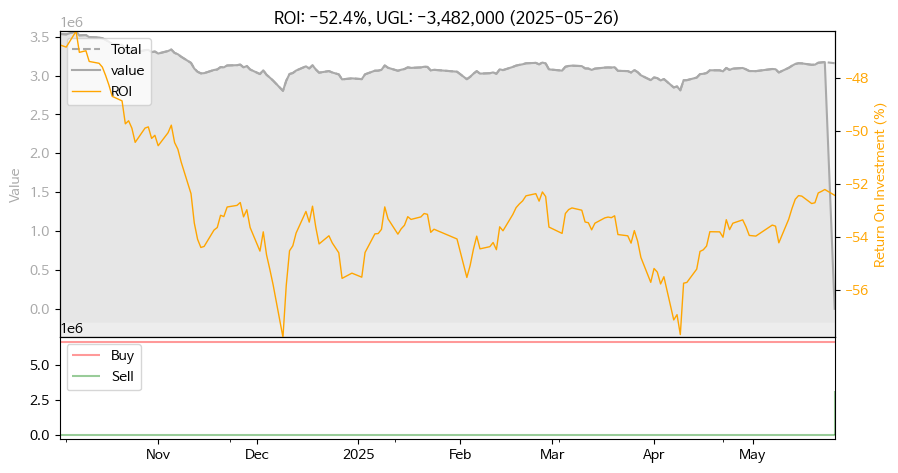

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

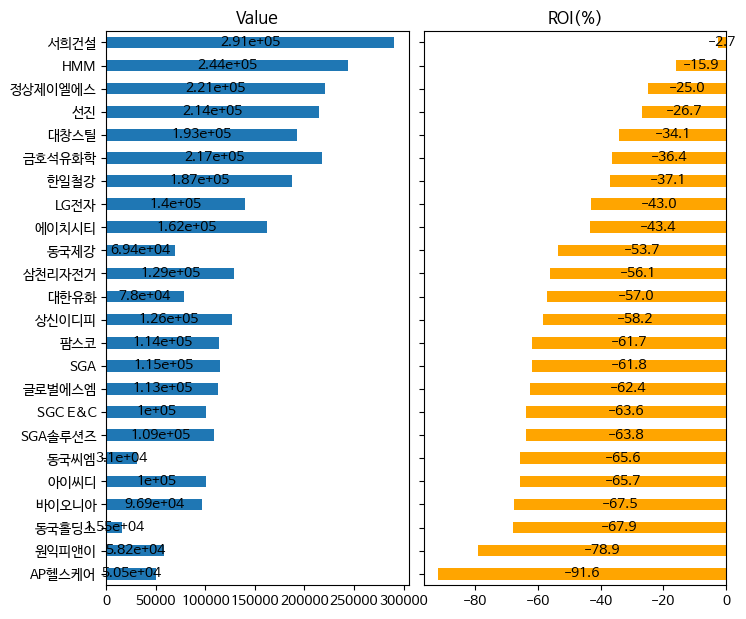

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [168]:
kw_st = dict(
    security_names = fund_names # need for new assets to buy
)

In [170]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

40 securities from 2023-03-29 to 2025-07-14 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_tdf_static_250710.csv loaded


name  ratio  \
date       ticker                                                             
2025-07-10 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105CH3411             삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55235CI9634                피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-10 K55101BV9571            0   6626435     NaN    0.082 2025-07-07  
           K55105CH3411      5000000   5000000     NaN    0.062 2025-07-07  
           K55206C95800            0   5217915  0.1429    0.065 2025-07-07  
           K55213C50702      5000000  10325039  0.1429    0.128 2025-07-07  
           K55214CD4825            0   6621699     NaN    0.082 2025-07-07  
           K55234BY9966            0   4843972  0.1429    0.060 2025-07-07  
           K55234DF3150      5000000  10276143  0.1429    0.128 2025-07-07  
           K55235CI9634      5000000   5000000     NaN    0.062 2025-07-07  
           K55301BU6139      5000000  10276899  0.1429    0.128 2025-07-07  
           K55301BU6253            0   5224440  0.1429    0.065 2025-07-07  
           K55364CF7048            0   4867825  0.1429    0.060 2025-07-07  
           K55365BT3694            0   6257027     NaN    0.078 2025-07-07

In [33]:
#pf_tdf.check_universe()

In [34]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

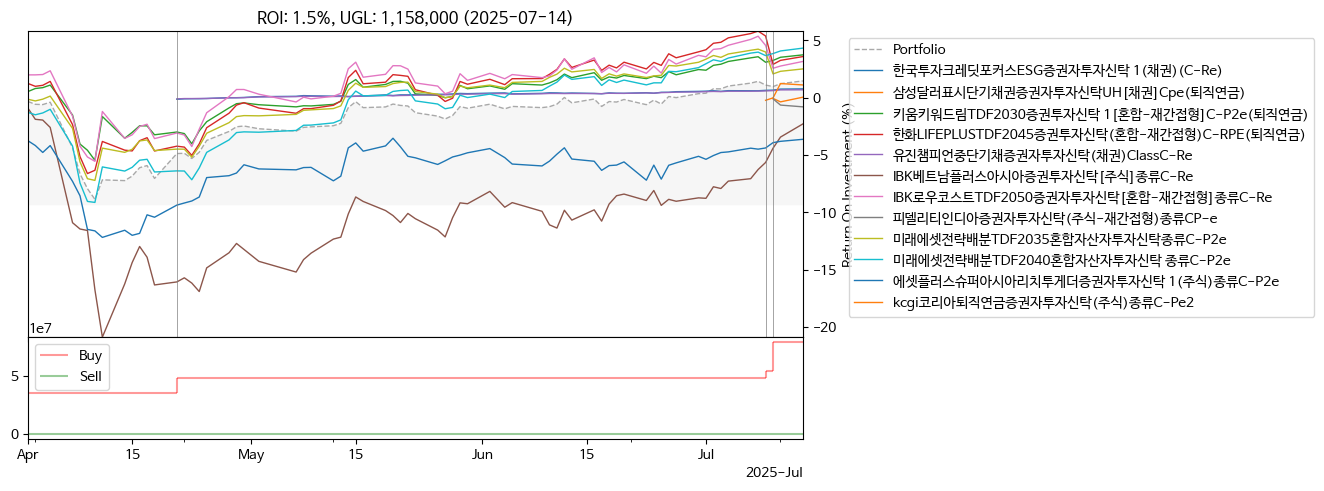

In [35]:
start = '2025-04-01'
#start = None
pf_tdf.plot(start, total=False, roi=True)

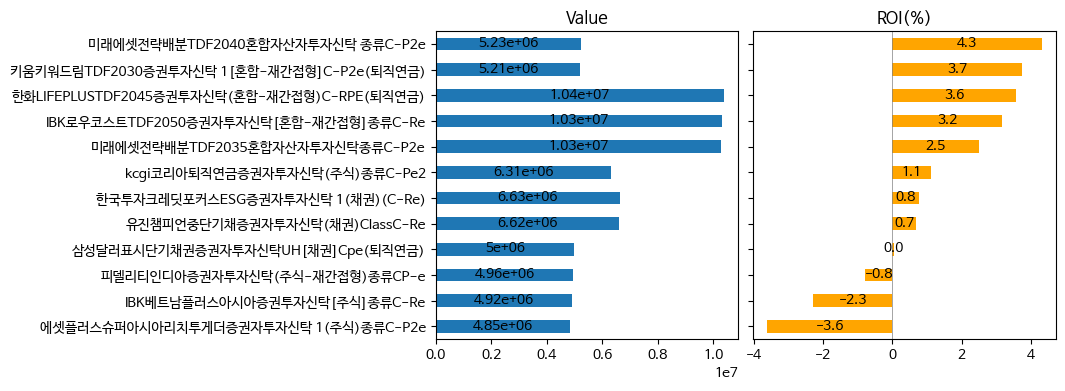

In [36]:
_ = pf_tdf.plot_assets(figsize=(8,4))

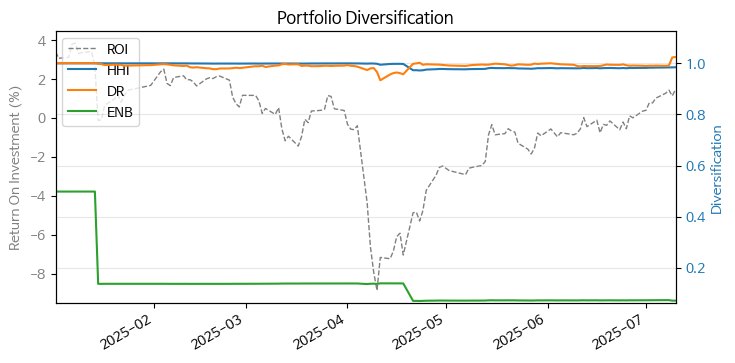

In [18]:
pf_tdf.diversification_history(start_date='2025-01-01')

In [37]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-07-14, 79392555, -170202, 80720749, 1157992, 0.0146


start    2024-06-19
end      2025-07-14
buy      79,392,555
sell       -170,202
value    80,720,749
ugl       1,157,992
roi          0.0146
dtype: object

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
tkrs = ['K55105CH3411', 'K55223BU8809', 'K55301BX0493', 'K55235CI9634', 'K55105BU7648', 'K55301BU6139', 'K55213C50702', 'K55234DF3150']
cash = [5e6, 5e6, 5e6, 5e6, 0, 0, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 5e6, 0, 5e6, 5e6, 5e6] # 0.114441, 0.715891 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 0, 5e6, 5e6, 5e6, 5e6] # 0.105829, 0.736896
cash = [5e6, 0, 0, 5e6, 0, 5e6, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe

In [26]:
tkrs = ['K55105CH3411', 'K55235CI9634', 'K55301BU6139', 'K55213C50702', 'K55234DF3150', 'K55365BT3694']
cash = [5e6, 5e6, 5e6, 5e6, 5e6, 6243943]

In [27]:
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

_ = [print(f'{k} {fund_names[k]}: {v:,.0f}') for k,v in zip(tkrs, cash)]
sum(buy.values())

K55105CH3411 삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금): 5,000,000
K55235CI9634 피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e: 5,000,000
K55301BU6139 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e: 5,000,000
K55213C50702 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금): 5,000,000
K55234DF3150 IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re: 5,000,000
K55365BT3694 kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2: 6,243,943


31243943.0

In [20]:
#buy = {'K55365BT3694':6243943} # transaction 2025-07-09
buy = {'K55301BU6139':5e6, 'K55213C50702':5e6, 'K55234DF3150':5e6, 
       'K55235CI9634':5e6, 'K55105CH3411':5e6} # transaction 2025-07-10

In [24]:
date_actual='2025-07-07'
kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = buy
)
_ = pf_tdf.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-10
Ticker names of None updated
All transactions saved to pf_tdf_static_250710.csv
ROI: 1.0%, UGL: 788,637 (2025-07-10)


In [25]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-07-10 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105CH3411             삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55235CI9634                피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-10 K55101BV9571            0   6626435     NaN    0.082 2025-07-07  
           K55105CH3411      5000000   5000000     NaN    0.062 2025-07-07  
           K55206C95800            0   5217915  0.1429    0.065 2025-07-07  
           K55213C50702      5000000  10325039  0.1429    0.128 2025-07-07  
           K55214CD4825            0   6621699     NaN    0.082 2025-07-07  
           K55234BY9966            0   4843972  0.1429    0.060 2025-07-07  
           K55234DF3150      5000000  10276143  0.1429    0.128 2025-07-07  
           K55235CI9634      5000000   5000000     NaN    0.062 2025-07-07  
           K55301BU6139      5000000  10276899  0.1429    0.128 2025-07-07  
           K55301BU6253            0   5224440  0.1429    0.065 2025-07-07  
           K55364CF7048            0   4867825  0.1429    0.060 2025-07-07  
           K55365BT3694            0   6257027     NaN    0.078 2025-07-07

In [23]:
pf_tdf.performance_stats(-2, sort_by='cagr')

,Simulated (250710),Simulated (250709),Realized
start,2023-03-29,2023-03-29,2024-06-20
end,2025-07-10,2025-07-09,2025-07-10
total_return,0.346849,0.330984,0.010811
cagr,0.139292,0.133566,0.010254
calmar,1.937884,1.598694,0.077264
max_drawdown,-0.071879,-0.083547,-0.132712
avg_drawdown,-0.007703,-0.007567,-0.03447
avg_drawdown_days,11.275862,11.781818,50.142857
monthly_vol,0.052504,0.055956,0.047575
monthly_sharpe,2.416048,2.178711,0.274148


## HANA

In [5]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [6]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [7]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

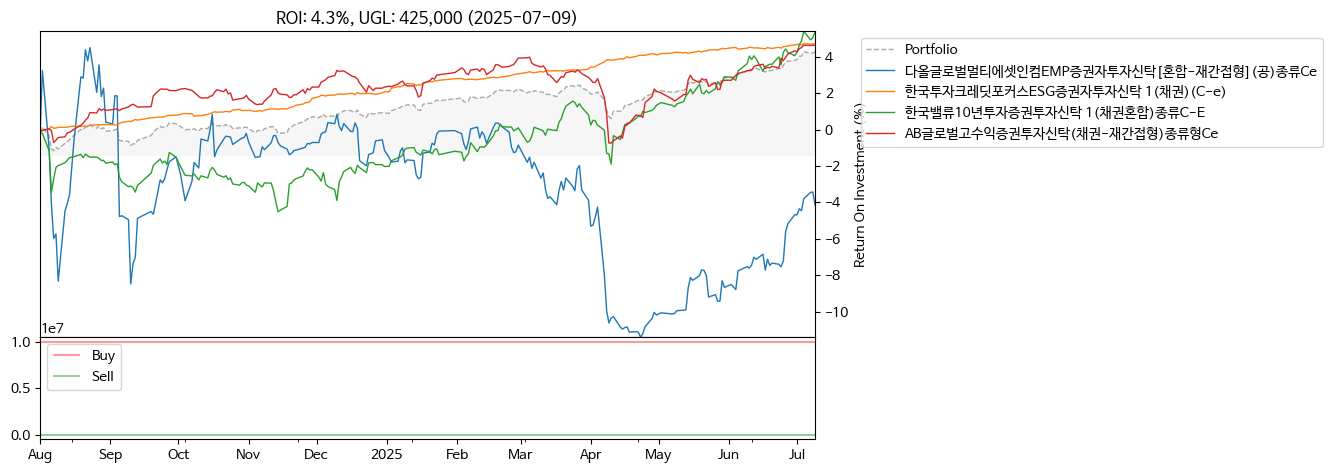

In [8]:
pf_hana.plot(total=False, roi=True)

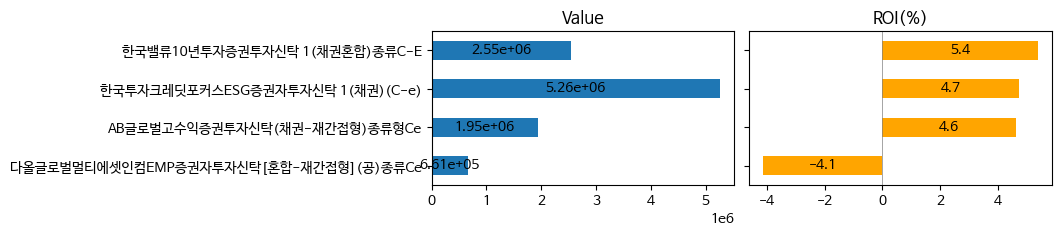

In [9]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

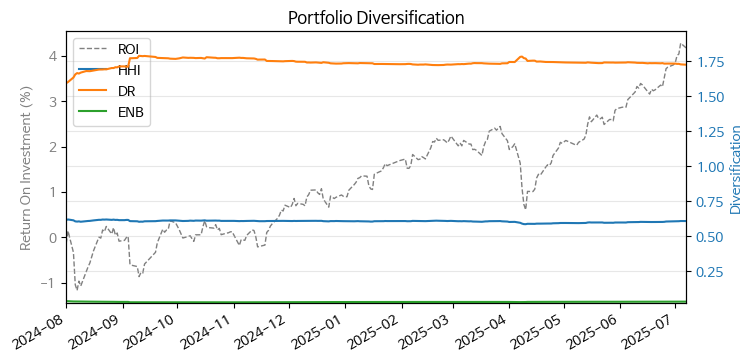

In [50]:
pf_hana.diversification_history()

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [42]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_hana.transaction_pipeline(**kwargs)

4 tickers selected by Selected from 2023-07-07 to 2025-07-07
Weights of tickers determined by Inv.Vol.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 0
ROI: 3.1%, UGL: 363,178 (2025-07-07)
Set save=True to save transaction record


In [53]:
pf_hana.view_record()

name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-07-07 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-07-07 K55306CV9946      -269072   403499  0.0386    0.039 2025-07-07  
           KR5101888398      1718610  6991324  0.6681    0.668 2025-07-07  
           KR5236AS4826     -1196604  1363699  0.1303    0.130 2025-07-07  
           KR5370AP9956      -252934  1705623  0.1630    0.163 2025-07-07

In [16]:
pf_hana.performance_stats()

,Realized,Simulated
start,2024-08-02,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.03603,0.163141
cagr,0.040079,0.069544
calmar,2.233076,3.890154
max_drawdown,-0.017948,-0.017877
avg_drawdown,-0.003405,-0.00237
avg_drawdown_days,10.869565,9.833333
monthly_vol,0.013836,0.024964
monthly_sharpe,3.29426,2.671603


## SAVE
연금저축

In [32]:
pf = 'SAVE_2503'

In [33]:
kw_st = dict(
    security_names = fund_names
)

In [34]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record(-1)

40 securities from 2023-03-29 to 2025-07-10 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_save_static_250709.csv loaded


name  ratio  \
date       ticker                                                          
2025-07-09 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101D20874            0  1647999    0.25    0.078 2025-07-07  
           K55107BU0252            0  2013272     NaN    0.096 2025-07-07  
           K55214B30803            0  1596365     NaN    0.076 2025-07-07  
           K55236BG3274            0  7161953     NaN    0.341 2025-07-07  
           K55307DH1659      4996857  6819487    0.25    0.325 2025-07-07  
           KR5235AK9808            0  1760747    0.25    0.084 2025-07-07

In [13]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

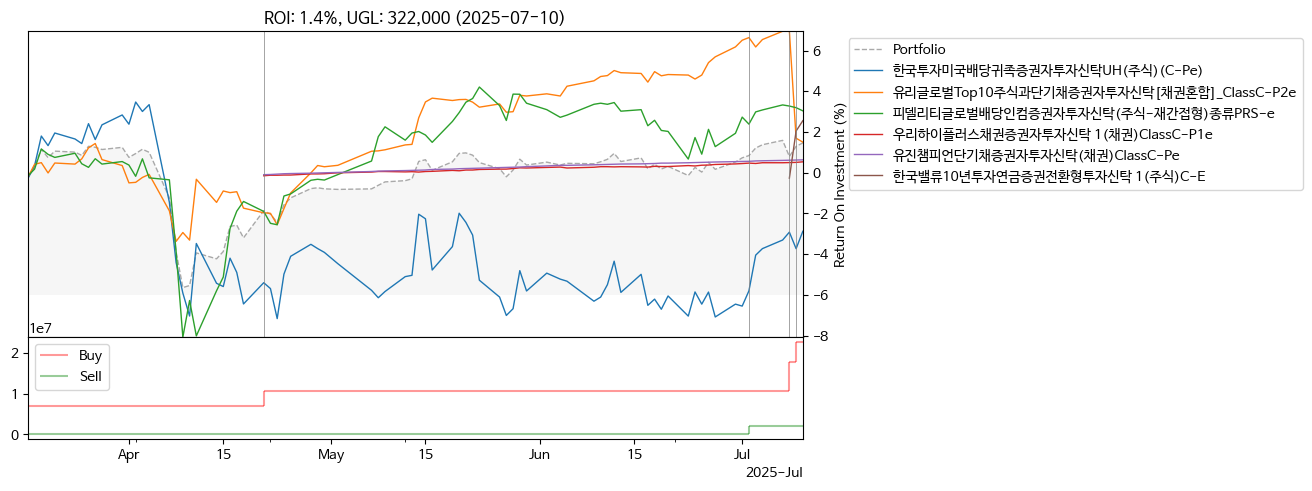

In [35]:
pf_save.plot(total=False, roi=True)

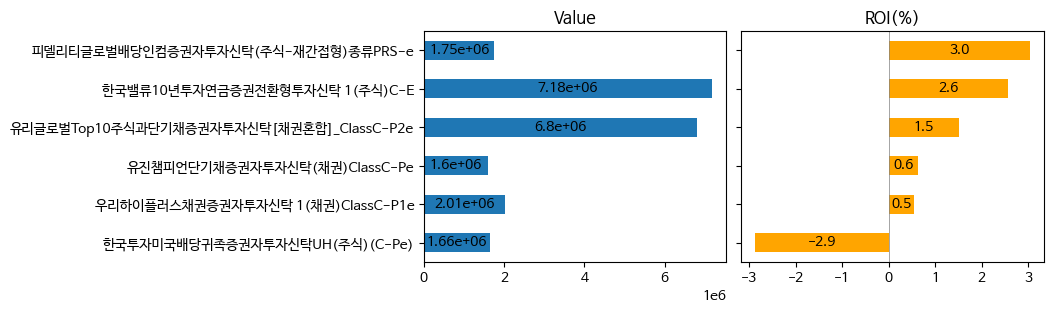

In [36]:
_ = pf_save.plot_assets(figsize=(8,3))

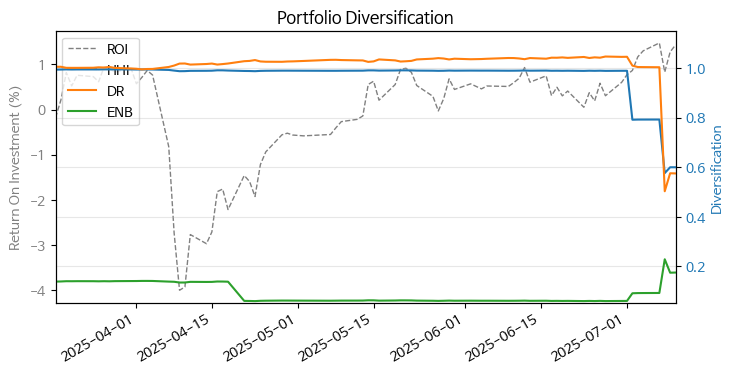

In [37]:
pf_save.diversification_history(start_date='2025-01-01')

In [51]:
date = None
#pf_save.valuate(date, print_msg=True, join_str=True)
pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
K55236BG3274,한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E,2025-07-08,2025-07-09,7000000.0,0.000000,7161953.0,161953.000000,0.023136
K55307DH1659,유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e,2025-03-17,2025-07-09,1700000.0,-3450.174700,1817013.0,113562.825300,0.066802
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,2025-03-17,2025-07-09,1700000.0,-2433.423337,1756759.0,54325.576663,0.031956
K55107BU0252,우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e,2025-04-21,2025-07-09,2000000.0,-1419.702132,2011617.0,10197.297868,0.005099
K55214B30803,유진챔피언단기채증권자투자신탁(채권)ClassC-Pe,2025-04-21,2025-07-09,1584916.0,-713.183408,1595534.0,9904.816592,0.006249
K55101D20874,한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe),2025-03-17,2025-07-09,1700000.0,-4271.808797,1640953.0,-63318.808797,-0.037246


In [38]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [39]:
date_actual='2025-07-07'

# 유리글로벌Top10, 피델리티글로벌배당인컴, 다올중국1등주, 한국밸류10년, 피델리티유럽
tkrs = ['K55307DH1659', 'KR5235AK9808', 'K55306BT9453', 'K55236BG3274', 'KR5235AK9691']
#cash = [2e6, 2e6, 2e6, 1e7, 2e6] # y/sharpe 1.38, cagr 0.12
#cash = [5e6, 3e6, 5e6, 7e6, 0] # y/sharpe 4.3, cagr 0.11
cash = [5e6, 2e6, 3e6, 7e6, 3e6] # y/sharpe 3.1, cagr 0.11
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

#buy = {'K55236BG3274':7e6} # transaction '2025-07-08'
#buy = {'K55307DH1659':4996857} # transaction '2025-07-09'
buy = {'KR5235AK9808':2e6, 'K55306BT9453':3e6, 'KR5235AK9691':3e6} # transaction after '2025-07-21'

kw = dict(
    buy = buy,
    #sell = sell,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-10
Ticker names of None updated
Set save=True to save transaction record
ROI: 1.1%, UGL: 323,370 (2025-07-10)


In [40]:
pf_save.view_record(-1)

name  ratio  \
date       ticker                                                          
2025-07-10 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55306BT9453                  다올중국1등주증권자투자신탁[주식]종류C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9691               피델리티유럽증권자투자신탁(주식-재간접형)PRS-e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-10 K55101D20874            0  1662517    0.25    0.057 2025-07-07  
           K55107BU0252            0  2013817     NaN    0.069 2025-07-07  
           K55214B30803            0  1596509     NaN    0.055 2025-07-07  
           K55236BG3274            0  7197456     NaN    0.248 2025-07-07  
           K55306BT9453      3000000  3000000     NaN    0.103 2025-07-07  
           K55307DH1659            0  6806523    0.25    0.234 2025-07-07  
           KR5235AK9691      3000000  3000000     NaN    0.103 2025-07-07  
           KR5235AK9808      2000000  3758101    0.25    0.129 2025-07-07

In [57]:
pf_save.performance_stats(-4)

,Realized,Simulated (250421),Simulated (250702),Simulated (250708),Simulated (250709)
start,2025-03-18,2023-03-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-09,2025-04-21,2025-07-02,2025-07-08,2025-07-09
total_return,0.011413,0.162477,0.21412,0.302128,0.312467
cagr,0.037363,0.075655,0.089581,0.12288,0.126624
calmar,0.764016,1.973048,1.891776,1.462142,1.6237
max_drawdown,-0.048903,-0.038344,-0.047353,-0.084041,-0.077985
avg_drawdown,-0.019053,-0.004604,-0.006002,-0.011093,-0.009874
avg_drawdown_days,35.0,11.235294,13.708333,18.736842,16.27907
monthly_vol,0.0385,0.033862,0.035536,0.081032,0.069545
monthly_sharpe,0.355776,2.089316,2.295487,1.396092,1.672834


## FISA

In [36]:
kw_st = dict(
    method_select = 'selected'    
)

In [37]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

40 securities from 2023-03-29 to 2025-07-15 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fisa_static_250604.csv loaded


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2025-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2025-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2025-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2025-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2025-06-02

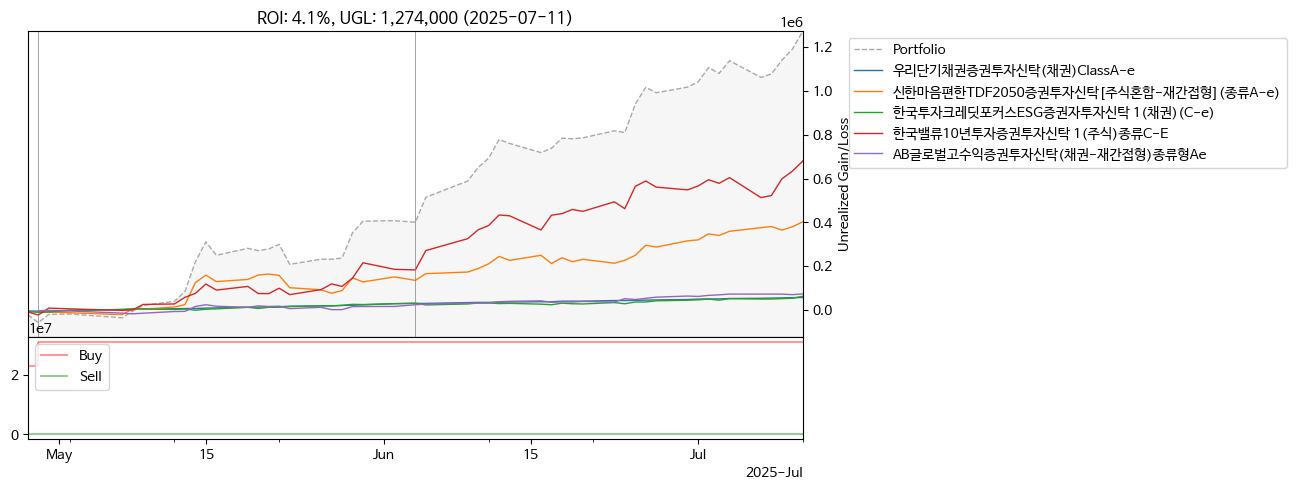

In [22]:
pf_fisa.plot(total=False, roi=False)

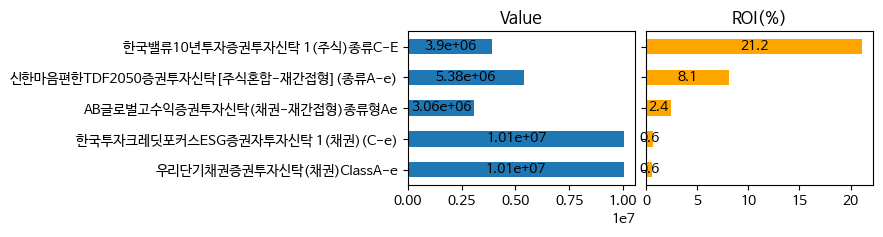

In [23]:
_ = pf_fisa.plot_assets(roi=True, figsize=(6,2))

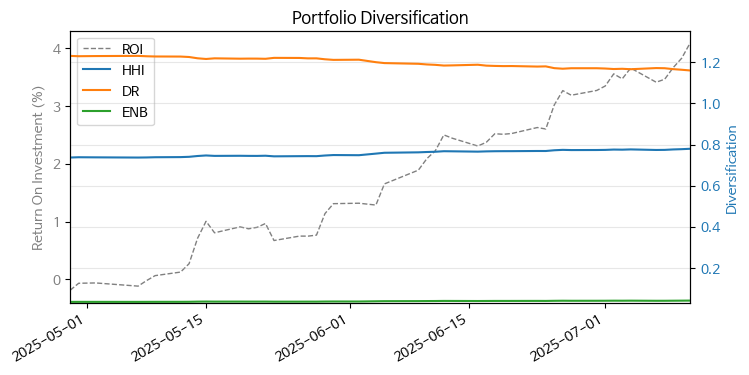

In [24]:
pf_fisa.diversification_history()

In [25]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-07-11, 31176035, -14161, 32463975, 1273779, 0.0409


start    2025-04-28
end      2025-07-11
buy      31,176,035
sell        -14,161
value    32,463,975
ugl       1,273,779
roi          0.0409
dtype: object

In [26]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [32]:
date_actual='2025-07-13' 

#buy = {'KR5236AS4818': 10063567}
#sell = ['K55107BB0404']
buy = {'KR5236AS4818':5e6} # transaction 7-17
sell = {'K55107BB0404':5e6} # transaction 7-16

kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = buy,
    sell = sell
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record(-2)

REMINDER: For the buy price, use the total amount, not the unit price.
REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-07-11
Set save=True to save transaction record
ROI: 3.5%, UGL: 1,260,053 (2025-07-11)


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-07-11 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2025-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2025-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2025-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2025-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2025-06-02  
2025-07-11 K55107BB0404     -5000000   5063567  0.3226    0.156 2025-07-11  
           K55210CO3737            0   5416500     NaN    0.166 2025-07-11  
           KR5101888398            0  10073489  0.3226    0.310 2025-07-11  
           KR5236AS4818      5000000   8909447  0.0968    0.274 2025-07-11  
           KR5370AP9949            0   3077570     NaN    0.095 2025-07-11

In [33]:
pf_fisa.performance_stats(-3)

,Realized,Simulated (250429),Simulated (250604),Simulated (250711)
start,2025-04-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-11,2025-04-29,2025-06-04,2025-07-11
total_return,0.036774,0.176228,0.199198,0.332336
cagr,0.198048,0.080908,0.086698,0.133729
calmar,60.216094,2.504332,2.566707,2.464134
max_drawdown,-0.003289,-0.032307,-0.033778,-0.05427
avg_drawdown,-0.00136,-0.003428,-0.00375,-0.006574
avg_drawdown_days,2.8,10.072727,11.169811,12.769231
monthly_vol,0.028789,0.031248,0.03208,0.054796
monthly_sharpe,4.888281,2.462868,2.49066,2.240103


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

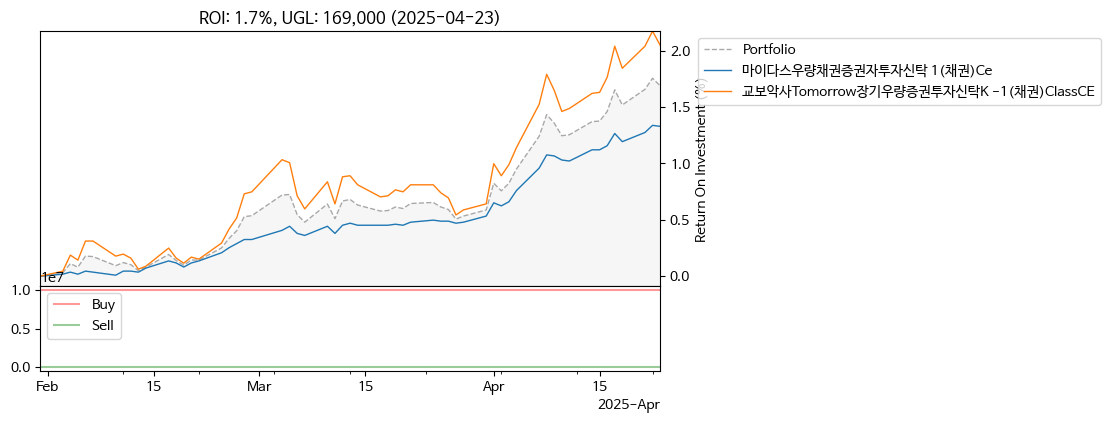

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

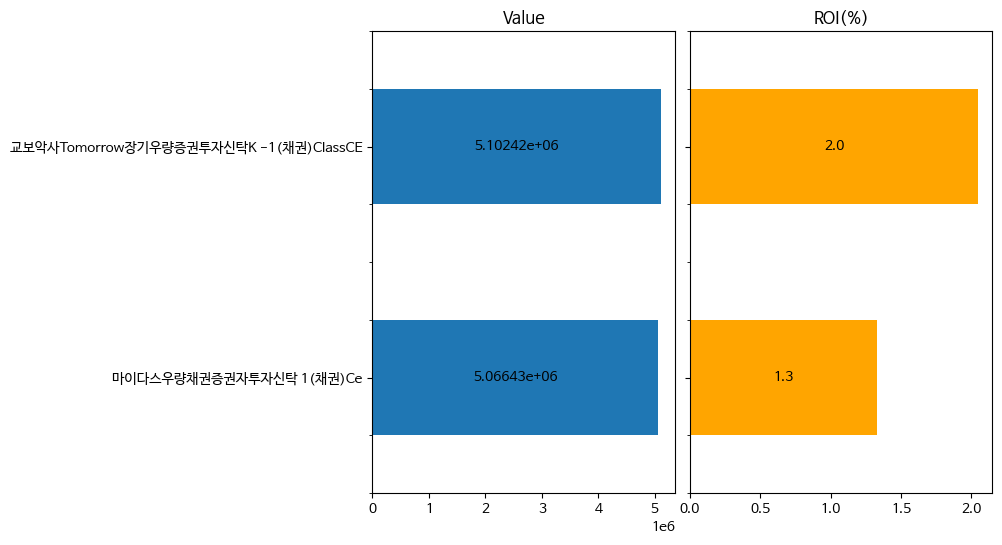

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [11]:
#file = 'test_pf_k200_momentum'
file = 'pf_k200_momentum'
pf_mmt = PM.create_portfolio('MMT_2407', file=file, **kw_cost) 

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250617.csv loaded


In [12]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-05-15 003230       삼양식품   991000            0    3     0.2    0.182   
           012450  한화에어로스페이스   826168            1    4     0.2    0.202   
           042660       한화오션    81450            3   42     0.2    0.207   
           064350       현대로템   113350            1   30     0.2    0.205   
           329180    HD현대중공업   416500            0    8     0.2    0.204   
2025-06-16 000150         두산   598000            6    6     0.2    0.184   
           000880         한화   100400           40   40     0.2    0.206   
           003230       삼양식품  1277000           -3    0     0.0    0.000   
           012450  한화에어로스페이스   970000            0    4     0.2    0.199   
           042660       한화오션    85100          -42    0     0.0    0.000   
           064350       현대로템   198200          -10   20     0.2    0.204   
           329180    HD현대중공업   448000            1    9     0.2    0.207   

                       date*  
date       ticker             
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16  
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17

In [54]:
#pf_mmt.get_value_history(total=False)

In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [41]:
#date = '2024-08-22'
date = WidgetTransaction[0]
#capital = WidgetTransaction[1]
capital = 0.1

kw = dict(
    nshares = True,
    date = date,
    capital = capital,
    save = WidgetTransaction[2],
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,816,750)
Mean absolute error of weights: 4 %
Deployed capital: 210,617
ROI: 5.9%, UGL: 4,568,713 (2025-07-16)
Set save=True to save transaction record


In [49]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-06-16 000150         두산   598000            6    6     0.2    0.184   
           000880         한화   100400           40   40     0.2    0.206   
           003230       삼양식품  1277000           -3    0     0.0    0.000   
           012450  한화에어로스페이스   970000            0    4     0.2    0.199   
           042660       한화오션    85100          -42    0     0.0    0.000   
           064350       현대로템   198200          -10   20     0.2    0.204   
           329180    HD현대중공업   448000            1    9     0.2    0.207   
2025-07-16 000150         두산   590000           -6    0     0.0    0.000   
           000880         한화    93700            2   42     0.2    0.205   
           012450  한화에어로스페이스   854000           -1    4     0.2    0.178   
           012630        HDC    22150          180  180     0.2    0.208   
           064350       현대로템   192500            0   20     0.2    0.201   
           329180    HD현대중공업   401500           -9    0     0.0    0.000   
           377300      카카오페이    67300           59   59     0.2    0.207   

                       date*  
date       ticker             
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17  
2025-07-16 000150 2025-07-16  
           000880 2025-07-16  
           012450 2025-07-16  
           012630 2025-07-16  
           064350 2025-07-16  
           329180 2025-07-16  
           377300 2025-07-16

In [14]:
def transaction_pipeline(self, date=None, capital=10000000, 
                         save=False, nshares=False, date_actual=None,
                         cleanup=False, n_retention=5, backup_path='del'):
    """
    nshares: set to True if saving last transaction as num of shares for the convenience of trading
    capital: int, float if adding capital. 
             dict of ticker to money to buy where all assets not in dict to sell 
    """        
    rank = self.select(date=date)
    if rank is None:
        return None # rank is not None even for static portfolio (method_select='all')
    
    if not self.check_new_transaction(date=None, msg=True):
        if self._check_result() is None:
            return None # return if record is not amount-based
        # calc profit at the last transaction
        dt = self.selected['date'] # selected defined by self.select
        _ = self.valuate(dt, total=True, int_to_str=True, print_msg=True)
        # add tickers of halt to recover original record
        return self.tradinghalts.recover(self.record, self.record_halt)  

    # check capital if given as asset to capital to buy
    # all assets not in dict will be sold
    if isinstance(capital, dict):
        method = 'specified'
        ttl = sum(capital.values())
        weights = {k:v/ttl for k,v in capital.items()}
        capital = ttl # set capital for allocate
    else:
        method, weights = None, None
        
    weights = self.weigh(method=method, weights=weights)
    if weights is None:
        return None
    
    df_net = self.allocate(capital=capital, int_nshares=not self.unit_fund)
    if df_net is None:
        return None

    return df_net
        
    df_rec = self.transaction(df_net, date_actual=date_actual)

    #return df_rec
    
    if df_rec is not None: # new transaction updated
        # recover record with halt before saving or converting to record with num of shares
        df_rec = df_rec if self.tradinghalts is None else self.tradinghalts.recover(df_rec, self.record_halt)
        if save:
            # save transaction as num of shares for the convenience of trading
            if nshares:
                df_prc = self._update_universe(df_rec, msg=False)
                # DO NOT SAVE both of transaction & net as int. Set int_nshares to False
                df_rec = self._convert_to_nshares(df_rec, df_prc, int_nshares=False)
                # set ratio to None for the new transaction which is a flag for calc of ratio with buy/sell price
                date_lt = df_rec.index.get_level_values(0).max()
                col_rat = self.cols_record['rat']
                df_rec.loc[date_lt, col_rat] = None
            self.save_transaction(df_rec)
            if cleanup: # delete older files after saving new
                self.cleanup(n_retention=n_retention, backup_path=backup_path, dry_run=False)
        else:
            print('Set save=True to save transaction record')
    else:
        print('Nothing to save')
    return df_rec

In [99]:
def transaction(self, df_net, date_actual=None):
    """
    add new transaction to records
    df_net: output of self.allocate
    date_actual: set actual transaction date
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_name = cols_record['name']
    col_rat = cols_record['rat']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_wgt = cols_record['wgt']
    col_dttr = cols_record['dttr']
    cols_val = [col_trs, col_net] # valid record only if not None nor zero
    cols_idx = [col_date, col_tkr]
    cols_all = [x for x in cols_record.values() if x not in cols_idx]
    cols_int = [col_trs, col_net]
            
    date = df_net.index.get_level_values(0).max()
    date_actual = date if date_actual is None else date_actual
    record = self.record
    if record is None: # no transation record saved
        # allocation is same as transaction for the 1st time
        df_rec = df_net.assign(**{col_trs: df_net[col_net], col_dttr:date_actual})
    else:
        # check input record by self.cols_record
        if not self._check_record(record):
            return None 
        # check if new transaction added
        if self.check_new_transaction(date):
            # confine tickers on transaction date
            date_lt = record.index.get_level_values(col_date).max()
            tickers_lt = record.loc[date_lt].index
            tickers_lt = tickers_lt.union(df_net.index.get_level_values(col_tkr))
            # add new to record after removing additional info except for cols_all in record
            df_rec = pd.concat([record[cols_all], df_net]).sort_index()
            # update universe by adding tickers not in the universe but in the past transactions
            df_prc = self._update_universe(df_rec, msg=True)

            #return df_rec, df_net, df_prc
        
        else: # return None if no new transaction
            return None

        
        # get assets of zero net and concat to df_rec
        lidx = [df_rec.index.get_level_values(i).unique() for i in range(2)]
        midx = pd.MultiIndex.from_product(lidx).difference(df_rec.index)
        df_m = pd.DataFrame({col_rat:1, col_net:0, col_wgt:0}, index=midx)
        # add security names
        if self.security_names is not None: 
            df_m = df_m.join(pd.Series(self.security_names, name=col_name), on=col_tkr)
        df_rec = pd.concat([df_rec, df_m]).sort_index()

        # get num of shares for transaction & net with price history
        # where num of shares is ratio of value to close from latest data
        df_nshares = self._get_nshares(df_rec, df_prc, cols_record, int_nshares=False)

        #return df_rec, df_nshares, date, col_net, col_tkr, col_trs, df_prc, col_date, col_dttr, date_actual
        
        # compute transaction amount for the transaction date
        #df_trs = (df_nshares.loc[date, col_net]
                  #.sub(df_nshares.groupby(col_tkr)[col_trs].sum()) # calc num of shares for transaction
                  #.apply(np.fix) # num of shares for transaction
        df_trs = (df_nshares.groupby(col_tkr, group_keys=False)[col_net]
                  .apply(lambda x: x - x.shift()).loc[date].round()                 
                  # get amount by multiplying price
                  .mul(df_prc.loc[date]).dropna() # transaction assumed by close price
                  #.round() # round very small transaction to zero for the cond later
                  .to_frame(col_trs).assign(**{col_date:date, col_dttr:date_actual})
                  .set_index(col_date, append=True).swaplevel())

        #return df_rec, df_trs, tickers_lt, cols_val, col_trs, col_net
        
        # confine tickers on the transaction date
        df_trs = df_trs.loc[df_trs.index.get_level_values(1).isin(tickers_lt)]
        df_rec.update(df_trs)
        # drop new tickers before the date
        df_rec = df_rec.dropna(subset=cols_val) 
        # drop rows with neither transaction nor net 
        cond = (df_rec[col_trs] == 0) & (df_rec[col_net] == 0)
        df_rec = df_rec.loc[~cond]

        #return df_rec

    df_rec = df_rec[cols_all]
    #df_rec.loc[:, cols_int] = df_rec.loc[:, cols_int].astype(int).sort_index(level=[0,1])
    df_rec[cols_int] = df_rec[cols_int].astype(int)

    # print Invested capital or Residual cash
    date_lt = df_rec.index.get_level_values(col_date).max()
    invested = df_rec.loc[date_lt, col_trs].sum()
    st = 'Deployed capital' if invested > 0 else 'Residual cash'
    print(f'{st}: {abs(invested):,}')
    
    # overwrite existing df_rec with new transaction
    self.df_rec = df_rec
    # print portfolio value and profit/loss after self.df_rec updated
    _ = self.valuate(total=True, int_to_str=True, print_summary_only=True)
    return df_rec

import pandas as pd
import numpy as np

In [100]:
self = pf_mmt
df_net = transaction_pipeline(self, **kw)
res = transaction(self, df_net)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 20% of the portfolio value (3,633,500)
Mean absolute error of weights: 1 %
Deployed capital: 3,296,300
ROI: 4.7%, UGL: 3,784,933 (2025-07-16)


In [101]:
res

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-07-22 000150           두산  0.972500      2600000  2528500   0.189   
           003230         삼양식품  0.995290      3185000  3170000   0.227   
           010120  LS ELECTRIC  0.986486      2664000  2628000   0.181   
           042700        한미반도체  0.975839      2980000  2908000   0.205   
           267260     HD현대일렉트릭  0.936306      2826000  2646000   0.198   
...                        ...       ...          ...      ...     ...   
2025-07-16 012450    한화에어로스페이스  1.000000       854000  4270000   0.200   
           012630          HDC  1.000000      4341400  4341400   0.200   
           064350         현대로템  1.000000       385000  4235000   0.200   
           329180      HD현대중공업  1.000000     -3613500        0   0.000   
           377300        카카오페이  1.000000      4307200  4307200   0.200   

                       date* price  
date       ticker                   
2024-07-22 000150 2024-07-22   NaN  
           003230 2024-07-22   NaN  
           010120 2024-07-22   NaN  
           042700 2024-07-22   NaN  
           267260 2024-07-22   NaN  
...                      ...   ...  
2025-07-16 012450 2025-07-16   NaN  
           012630 2025-07-16   NaN  
           064350 2025-07-16   NaN  
           329180 2025-07-16   NaN  
           377300 2025-07-16   NaN  

[90 rows x 7 columns]

In [44]:
df_rec, df_net, df_prc = res

In [45]:
date = '2025-07-16'
df_net.loc[date]

,name,ratio,net,weight,date*,price
ticker,,,,,,
064350,현대로템,1,4235000.0,0.2,2025-07-16,None
012450,한화에어로스페이스,1,4270000.0,0.2,2025-07-16,None
000880,한화,1,4310200.0,0.2,2025-07-16,None
012630,HDC,1,4341400.0,0.2,2025-07-16,None
377300,카카오페이,1,4307200.0,0.2,2025-07-16,None


In [47]:
df_rec.loc[date, ['transaction', 'net']].apply(lambda x: x/df_prc.loc[date, df_rec.loc[date].index])

,transaction,net
ticker,,
000880,NaN,46.0
012450,NaN,5.0
012630,NaN,196.0
064350,NaN,22.0
377300,NaN,64.0


In [48]:
df_rec.loc[date, ['transaction', 'net']]

,transaction,net
ticker,,
000880,NaN,4310200.0
012450,NaN,4270000.0
012630,NaN,4341400.0
064350,NaN,4235000.0
377300,NaN,4307200.0


In [40]:
df_rec.loc['2025-07-16']

,name,ratio,transaction,net,weight,date*,price
ticker,,,,,,,
000880,한화,1.0,NaN,4310200.0,0.2,2025-07-16,None
012450,한화에어로스페이스,1.0,NaN,4270000.0,0.2,2025-07-16,None
012630,HDC,1.0,NaN,4341400.0,0.2,2025-07-16,None
064350,현대로템,1.0,NaN,4235000.0,0.2,2025-07-16,None
377300,카카오페이,1.0,NaN,4307200.0,0.2,2025-07-16,None


In [51]:
df_rec, df_trs, tickers_lt, cols_val, col_trs, col_net = res 

In [53]:
df_rec.loc['2025-07-16']
#df_trs

,name,ratio,transaction,net,weight,date*,price
ticker,,,,,,,
000150,두산,1.0,NaN,0.0,0.0,NaT,NaN
000880,한화,1.0,NaN,4310200.0,0.2,2025-07-16,NaN
003230,삼양식품,1.0,NaN,0.0,0.0,NaT,NaN
010120,LS ELECTRIC,1.0,NaN,0.0,0.0,NaT,NaN
010130,고려아연,1.0,NaN,0.0,0.0,NaT,NaN
011790,SKC,1.0,NaN,0.0,0.0,NaT,NaN
012450,한화에어로스페이스,1.0,NaN,4270000.0,0.2,2025-07-16,NaN
012630,HDC,1.0,NaN,4341400.0,0.2,2025-07-16,NaN
042660,한화오션,1.0,NaN,0.0,0.0,NaT,NaN


In [54]:
df_trs

transaction      date*
date                                     
2025-07-16 000150   -3540000.0 2025-07-16
           000880     562200.0 2025-07-16
           003230          0.0 2025-07-16
           010120          0.0 2025-07-16
           010130          0.0 2025-07-16
           011790          0.0 2025-07-16
           012450      73017.0 2025-07-16
           012630    4341400.0 2025-07-16
           042660         -0.0 2025-07-16
           042700         -0.0 2025-07-16
           064350     385000.0 2025-07-16
           079550         -0.0 2025-07-16
           267260         -0.0 2025-07-16
           298040         -0.0 2025-07-16
           329180   -3613500.0 2025-07-16
           377300    4307200.0 2025-07-16
           489790          0.0 2025-07-16

In [ ]:
# confine tickers on the transaction date
df_trs = df_trs.loc[df_trs.index.get_level_values(1).isin(tickers_lt)]
df_rec.update(df_trs)
# drop new tickers before the date
df_rec = df_rec.dropna(subset=cols_val) 
# drop rows with neither transaction nor net 
cond = (df_rec[col_trs] == 0) & (df_rec[col_net] == 0)
df_rec = df_rec.loc[~cond]

date = '2025-07-16'
res.loc[date]

In [23]:
res.loc[date, ['transaction', 'net']].apply(lambda x: x/pf_mmt.df_universe.loc[date, res.loc[date].index])

,transaction,net
ticker,,
000150,-6.0,0.0
000880,5.0,46.0
012450,0.0,5.0
012630,196.0,196.0
064350,1.0,22.0
329180,-9.0,0.0
377300,64.0,64.0


In [72]:
tkrs = pf_mmt.view_record(-1, nshares=True).index.get_level_values(1).unique()

In [57]:
df_rec, df_nshares, date, col_net, col_tkr, col_trs, df_prc, col_date, col_dttr, date_actual = res

In [95]:
df_nshares.groupby('ticker', group_keys=False)['net'].apply(lambda x: x - x.shift()) #.loc['2025-07-16']

date        ticker
2024-07-22  000150     NaN
            000880     NaN
            003230     NaN
            010120     NaN
            010130     NaN
                      ... 
2025-07-16  267260     0.0
            298040     0.0
            329180    -9.0
            377300    64.0
            489790     0.0
Name: net, Length: 238, dtype: float64

In [81]:
# compute transaction amount for the transaction date
#df_trs = 
(df_nshares.loc[date, col_net]
          .sub(df_nshares.groupby(col_tkr)[col_trs].sum()) # calc num of shares for transaction
#          .apply(np.fix)
          # get amount by multiplying price
#          .mul(df_prc.loc[date]).dropna() # transaction assumed by close price
#          .round() # round very small transaction to zero for the cond later
#          .to_frame(col_trs).assign(**{col_date:date, col_dttr:date_actual})
#          .set_index(col_date, append=True).swaplevel()
            .loc[tkrs]
)

ticker
000150   -6.000000e+00
000880    6.000000e+00
003230    6.970535e-10
012450    8.549972e-02
042660   -1.009673e-08
064350    2.000000e+00
329180   -9.000000e+00
dtype: float64

In [83]:
date

Timestamp('2025-07-16 00:00:00')

In [74]:
tkrs

Index(['000150', '000880', '003230', '012450', '042660', '064350', '329180'], dtype='object', name='ticker')

In [76]:
df_nshares.loc['2025-06-16'].loc[tkrs]

,transaction,net,price
ticker,,,
000150,6.0,6.000000,5.980000e+05
000880,40.0,40.000000,1.004000e+05
003230,-3.0,0.000000,1.277000e+06
012450,0.0,4.000000,9.700000e+05
042660,-42.0,0.000000,8.510000e+04
064350,-10.0,19.999995,1.982000e+05
329180,1.0,9.000000,4.480000e+05


In [77]:
df_nshares.loc['2025-07-16'].loc[tkrs]

,transaction,net,price
ticker,,,
000150,NaN,0.0,590000.0
000880,NaN,46.0,93700.0
003230,NaN,0.0,1476000.0
012450,NaN,5.0,854000.0
042660,NaN,0.0,78000.0
064350,NaN,22.0,192500.0
329180,NaN,0.0,401500.0


In [71]:
df_net.loc['2025-07-16']

,name,ratio,net,weight,date*,price
ticker,,,,,,
064350,현대로템,1,3850000.0,0.2,2025-07-16,None
012450,한화에어로스페이스,1,3416000.0,0.2,2025-07-16,None
000880,한화,1,3935400.0,0.2,2025-07-16,None
012630,HDC,1,3987000.0,0.2,2025-07-16,None
377300,카카오페이,1,3970700.0,0.2,2025-07-16,None


In [85]:
df_nshares.loc['2025-07-16']

,transaction,net,price
ticker,,,
000150,NaN,0.0,590000.0
000880,NaN,42.0,93700.0
003230,NaN,0.0,1476000.0
010120,NaN,0.0,278500.0
010130,NaN,0.0,820000.0
011790,NaN,0.0,101100.0
012450,NaN,4.0,854000.0
012630,NaN,180.0,22150.0
042660,NaN,0.0,78000.0


In [48]:
pf_mmt.df_universe['012450']

date
2022-01-03     50525
2022-01-04     51339
2022-01-05     51849
2022-01-06     50321
2022-01-07     51034
               ...  
2025-07-10    853000
2025-07-11    806000
2025-07-14    807000
2025-07-15    848000
2025-07-16    854000
Name: 012450, Length: 865, dtype: int64

In [15]:
df_rec = pf_mmt.record
df_universe = pf_mmt.df_universe

In [19]:
pf_mmt._calc_value_history(df_rec, df_universe, total=False, exclude_cost=True)

date        ticker
2024-07-22  000150    2673521
            003230    3200070
            010120    2700493
            267260    3018244
            042700    3053782
                       ...   
2025-07-15  003230          0
            012450    3392000
            042660          0
            064350    3864201
            329180    3542592
Length: 1549, dtype: int64

In [30]:
def _calc_value_history(self, df_rec, df_universe, end_date=None, name=None, msg=False, 
                        total=True, exclude_cost=True):
    """
    calc historical of portfolio value from transaction
    end_date: calc value from 1st transaction of df_rec to end_date.
    name: name of output series
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_rat = cols_record['rat']
    col_net = cols_record['net']
    end = datetime.today() if end_date is None else end_date
    sr_ttl = None
    dates_trs = df_rec.index.get_level_values(0).unique()
    # get number of shares
    sr_nshares = self._get_nshares(df_rec, df_universe, cols_record, int_nshares=False)
    if sr_nshares is None:
        return
    else:
        sr_nshares = sr_nshares[col_net]
    
    # loop for transaction dates in descending order
    for start in dates_trs.sort_values(ascending=False):
        n_tickers = sr_nshares.loc[start] # num of net shares
        df_c = df_universe.loc[start:end, n_tickers.index] # close price
        if len(df_c) == 0: # no price data from transaction date start
            continue
        # calc combined security value history from prv transaction (start) to current (end) 
        sr_i = df_c.apply(lambda x: x*n_tickers.loc[x.name]) # x.name: index name
        # concat histories        
        sr_ttl = sr_i if sr_ttl is None else pd.concat([sr_ttl, sr_i])
        end = start - pd.DateOffset(days=1)
    
    if sr_ttl is None:
        return print('ERROR: no historical')
    else:
        sr_ttl = sr_ttl.sort_index()

    if not exclude_cost:
        cost = self.cost or dict()
        kw = dict(period=3, percent=True, **cost)
        sr_ttl = CostManager.get_history_with_fee(sr_ttl, **kw)
    
    if total:
        sr_ttl = sr_ttl.fillna(0).sum(axis=1).astype(int)
    else:
        sr_ttl = sr_ttl.stack().dropna().astype(int)
    return sr_ttl if name is None else sr_ttl.rename(name)


from datetime import datetime
import pandas as pd
from pf_utils import CostManager

In [31]:
_calc_value_history(pf_mmt, df_rec, df_universe, total=False, exclude_cost=False)

date        ticker
2024-07-22  000150    2595130
            003230    3179035
            010120    2659010
            267260    2820707
            042700    2974419
                       ...   
2025-07-15  003230          0
            012450    3385647
            042660          0
            064350    3856964
            329180    3535957
Length: 1549, dtype: int64

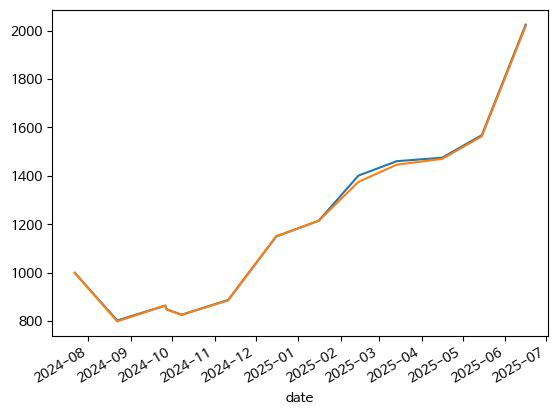

In [19]:
import pandas as pd
idx = pd.IndexSlice
tkr = '003230'
df = pf_mmt._calc_price_from_transactions(df_rec, price_start=1000).loc[idx[:, tkr]]
ax = df.plot()
df2 = df_universe.loc[df.index, tkr]
_ = df2.div(df2.iloc[0]).mul(df.iloc[0]).plot(ax=ax)

In [8]:
pf_mmt.view_record(1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2024-07-22 000150           두산  200000           13   13   0.189    0.182   
           003230         삼양식품  637000            5    5   0.227    0.223   
           010120  LS ELECTRIC  222000           12   12   0.181    0.187   
           042700        한미반도체  149000           20   20   0.205    0.209   
           267260     HD현대일렉트릭  314000            9   10   0.198    0.198   

                       date*  
date       ticker             
2024-07-22 000150 2024-07-22  
           003230 2024-07-22  
           010120 2024-07-22  
           042700 2024-07-22  
           267260 2024-07-22

In [5]:
pf_mmt.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-07-22,4.0,5.0,0.800
2024-08-22,2.0,5.0,0.400
2024-09-26,0.0,4.0,0.000
2024-09-27,1.0,6.0,0.167
2024-10-08,1.0,5.0,0.200
2024-11-11,0.0,5.0,0.000
2024-12-16,3.0,5.0,0.600
2025-01-16,1.0,5.0,0.200
2025-02-14,1.0,5.0,0.200


In [23]:
pf_mmt.view_record(0, nshares=True, msg=False, int_nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                            
2024-07-22 000150           두산   200000           13   13   0.189    0.182   
           003230         삼양식품   637000            5    5   0.227    0.223   
           010120  LS ELECTRIC   222000           12   12   0.181    0.187   
           042700        한미반도체   149000           20   20   0.205    0.209   
           267260     HD현대일렉트릭   314000            9   10   0.198    0.198   
...                        ...      ...          ...  ...     ...      ...   
2025-06-16 003230         삼양식품  1277000           -3    0   0.000    0.000   
           012450    한화에어로스페이스   970000            0    4   0.200    0.199   
           042660         한화오션    85100          -42    0   0.000    0.000   
           064350         현대로템   198200          -10   20   0.200    0.203   
           329180      HD현대중공업   448000            1    9   0.200    0.207   

                       date*  
date       ticker             
2024-07-22 000150 2024-07-22  
           003230 2024-07-22  
           010120 2024-07-22  
           042700 2024-07-22  
           267260 2024-07-22  
...                      ...  
2025-06-16 003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17  

[83 rows x 7 columns]

In [22]:
int(1000.2355)

1000

In [ ]:
pf_mmt._get_trading_price(df_rec, df_universe)

date        ticker
2024-07-22  000150    200000.0
            003230    637000.0
            010120    222000.0
            042700    149000.0
            267260    314000.0
Name: price, dtype: float64

In [7]:
cols_record = pf_mmt.cols_record
df_ns = pf_mmt._get_nshares(df_rec, df_universe, cols_record, 
                     int_nshares=False, add_price=True)
df_ns

transaction        net     price
date       ticker                                  
2024-07-22 000150         13.0  13.367609  200000.0
           003230          5.0   5.023659  637000.0
           010120         12.0  12.164384  222000.0
           042700         20.0  20.495186  149000.0
           267260          9.0   9.612245  314000.0

In [10]:
pf_mmt._calc_price_from_transactions(df_rec)

date        ticker
2024-07-22  000150    1000.0
            003230    1000.0
            010120    1000.0
            042700    1000.0
            267260    1000.0
dtype: float64

In [16]:
dt = df_rec.index.get_level_values(0).max()
tkrs = df_rec.loc[dt].index
df_universe.loc[dt, tkrs].mul(df_ns.loc[dt, 'net'])

ticker
000150    2528500.0
003230    3170000.0
010120    2628000.0
042700    2908000.0
267260    2646000.0
dtype: float64

In [19]:
df_universe.loc[:, tkrs].stack()

date        ticker
2022-01-03  000150     123000
            003230      96300
            010120      55600
            042700      19075
            267260      20050
                       ...   
2025-07-15  000150     603000
            003230    1491000
            010120     278000
            042700      91300
            267260     474000
Length: 4320, dtype: int64

In [21]:
df_universe.stack().rename_axis(['date',' ticker'])

date         ticker
2022-01-03  005930      78600.0
            000660     128500.0
            207940     900338.0
            105560      55300.0
            005380     210500.0
                         ...   
2025-07-15  145720      68900.0
            006650     102300.0
            002710      16940.0
            456040      57300.0
            093370       4745.0
Length: 169418, dtype: float64

In [24]:
df_universe.rename_axis('ticker', axis=1).stack()

date        ticker
2022-01-03  005930     78600.0
            000660    128500.0
            207940    900338.0
            105560     55300.0
            005380    210500.0
                        ...   
2025-07-15  145720     68900.0
            006650    102300.0
            002710     16940.0
            456040     57300.0
            093370      4745.0
Length: 169418, dtype: float64

In [91]:
file = 'test_mmt'
pf_mmt = PM.create_portfolio('MMT_2407', file=file, **kw_cost) 

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record test_mmt_250519.csv loaded
ERROR: Run update_record first after editing record


In [92]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

Transaction file test_mmt_250519.csv updated
self.record updated


In [93]:
pf_mmt.view_record(0, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-04-07 003230       삼양식품   782000            2    2     0.2    0.164   
           012450  한화에어로스페이스   632181            3    3     0.2    0.199   
           042660       한화오션    62500           33   33     0.2    0.216   
           064350       현대로템    90400           23   23     0.2    0.218   
           329180    HD현대중공업   275500            7    7     0.2    0.202   
2025-05-19 003230       삼양식품  1152000            0    2     0.2    0.179   
           012450  한화에어로스페이스   826168            0    3     0.2    0.193   
           012630        HDC    19250          146  146     0.2    0.219   
           042660       한화오션    78900          -33    0     0.0    0.000   
           064350       현대로템   109000            2   25     0.2    0.212   
           329180    HD현대중공업   423500           -1    6     0.2    0.198   

                       date*  
date       ticker             
2025-04-07 003230 2025-04-07  
           012450 2025-04-07  
           042660 2025-04-07  
           064350 2025-04-07  
           329180 2025-04-07  
2025-05-19 003230 2025-05-19  
           012450 2025-05-19  
           012630 2025-05-19  
           042660 2025-05-19  
           064350 2025-05-19  
           329180 2025-05-19

In [94]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-07, 2025-07-16, 12558786, 3021641, 15939492, 6402347, 0.51


start    2025-04-07
end      2025-07-16
buy      12,558,786
sell      3,021,641
value    15,939,492
ugl       6,402,347
roi            0.51
dtype: object

In [79]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [90]:
#date_actual = '2025-07-17'
cleanup = False
capital = WidgetTransaction[1]
capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    cleanup = cleanup,
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-05-13 to 2025-05-12
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,285,770)
Mean absolute error of weights: 6 %
Deployed capital: 1,300
ROI: 51.0%, UGL: 6,402,347 (2025-07-16)
All transactions saved to test_mmt_250519.csv


In [89]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-04-07 003230       삼양식품   782000            2    2     0.2    0.164   
           012450  한화에어로스페이스   632181            3    3     0.2    0.199   
           042660       한화오션    62500           33   33     0.2    0.216   
           064350       현대로템    90400           23   23     0.2    0.218   
           329180    HD현대중공업   275500            7    7     0.2    0.202   
2025-05-19 003230       삼양식품  1152000            0    2     0.2    0.179   
           012450  한화에어로스페이스   826168            0    3     0.2    0.193   
           012630        HDC    19250          146  146     0.2    0.219   
           042660       한화오션    78900          -33    0     0.0    0.000   
           064350       현대로템   109000            2   25     0.2    0.212   
           329180    HD현대중공업   423500           -1    6     0.2    0.198   

                       date*  
date       ticker             
2025-04-07 003230 2025-04-07  
           012450 2025-04-07  
           042660 2025-04-07  
           064350 2025-04-07  
           329180 2025-04-07  
2025-05-19 003230 2025-05-19  
           012450 2025-05-19  
           012630 2025-05-19  
           042660 2025-05-19  
           064350 2025-05-19  
           329180 2025-05-19

# testing

In [18]:
def transaction_nshares(self, date=None, transaction=None, date_actual=None):
    if (transaction is None) or not isinstance(transaction, dict):
        return print('ERROR: Set tickers to trade')
    
    df_rec = self._check_result(True)
    if df_rec is None:
        return None

    # set transaction record of num of shares and price data
    df_prc = self._update_universe(df_rec, msg=False)
    df_rec = self._convert_to_nshares(df_rec, df_prc, int_nshares=True)

    # check new transaction date
    date_lt = df_rec.index.get_level_values(0).max()
    date = df_prc.index.max() if date is None else date
    date = datetime.strptime(date, self.date_format) if isinstance(date, str) else date
    if date <= date_lt:
        return print('ERROR: Check date')
    date_actual = date if date_actual is None else date_actual
    
    security_names = self.security_names
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_name = cols_record['name']
    col_rat = cols_record['rat']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_wgt = cols_record['wgt']
    col_dttr = cols_record['dttr']
    col_prc = cols_record['prc']

    # copy the latest transaction for new one
    df_net = df_rec.loc[date_lt]
    df_net = df_net.loc[df_net[col_net] > 0]


    # create new transaction
    df_trs = pd.DataFrame.from_dict(transaction, orient='index', columns=[col_trs, col_prc])
    df_trs = df_trs.join(df_net[col_net]).fillna(0).assign(**{col_net: lambda x: x[col_net] + x[col_trs]})
    df_trs = df_trs.rename_axis(col_tkr)

    # add new ticker before update
    df_net = pd.concat([df_net, df_trs.loc[df_trs.index.difference(df_net.index)]])
    df_net = df_net.assign(**{col_trs:0, col_rat:1,  col_dttr:date_actual})
    df_net.update(df_trs) # update transaction, unit-price & net
    
    # add new transaction date as index    
    df_net = df_net.assign(**{col_date: date}).set_index(col_date, append=True).swaplevel(0)
    
    # add security names
    df_net = self._update_ticker_name(df_net, self.security_names)

    #return df_net, df_prc

    # convert to amount-based record
    df_net = self._update_price_ratio(df_net, df_prc, overwrite=True)
    df_net = self._convert_to_amount(df_net, df_prc)
        
    return pd.concat([df_rec, df_net]).sort_index()


import pandas as pd

In [159]:
def transaction_shares(self, date=None, transaction=None, date_actual=None):
    if (transaction is None) or not isinstance(transaction, dict):
        return print('ERROR: Set tickers to trade')
    
    df_rec = self._check_result(True)
    if df_rec is None:
        return None

    # set transaction record of num of shares and price data
    df_prc = self._update_universe(df_rec, msg=False)
    df_net = self._convert_to_nshares(df_rec, df_prc, int_nshares=True)

    # check new transaction date
    date_lt = df_net.index.get_level_values(0).max()
    date = df_prc.index.max() if date is None else date
    date = datetime.strptime(date, self.date_format) if isinstance(date, str) else date
    if date <= date_lt:
        return print('ERROR: Check date')
    date_actual = date if date_actual is None else date_actual
    
    security_names = self.security_names
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_name = cols_record['name']
    col_rat = cols_record['rat']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_wgt = cols_record['wgt']
    col_dttr = cols_record['dttr']
    col_prc = cols_record['prc']

    # copy the latest transaction for new one
    df_net = df_net.loc[date_lt]
    df_net = df_net.loc[df_net[col_net] > 0]

    # create new transaction
    df_trs = pd.DataFrame.from_dict(transaction, orient='index', columns=[col_trs, col_prc])
    df_trs = df_trs.join(df_net[col_net]).fillna(0).assign(**{col_net: lambda x: x[col_net] + x[col_trs]})
    df_trs = df_trs.rename_axis(col_tkr)

    # add new ticker before update
    df_net = pd.concat([df_net, df_trs.loc[df_trs.index.difference(df_net.index)]])
    df_net = df_net.assign(**{col_trs:0, col_rat:1,  col_dttr:date_actual})
    df_net.update(df_trs) # update transaction, unit-price & net
    
    # add new transaction date as index    
    df_net = df_net.assign(**{col_date: date}).set_index(col_date, append=True).swaplevel(0)
    
    # add security names
    df_net = self._update_ticker_name(df_net, self.security_names)

    #return df_net, df_prc

    # convert to amount-based record
    df_net = self._update_price_ratio(df_net, df_prc, overwrite=True)
    df_net = self._convert_to_amount(df_net, df_prc)

    #return df_net
        
    return pd.concat([df_rec, df_net]).sort_index()


import pandas as pd

In [154]:
file = 'test_mmt'
pf_mmt = PM.create_portfolio('MMT_2407', file=file, **kw_cost) 

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record test_mmt_250519.csv loaded


In [155]:
pf_mmt.view_record(nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-04-07 003230       삼양식품   782000            2    2     0.2    0.164   
           012450  한화에어로스페이스   632181            3    3     0.2    0.199   
           042660       한화오션    62500           33   33     0.2    0.216   
           064350       현대로템    90400           23   23     0.2    0.218   
           329180    HD현대중공업   275500            7    7     0.2    0.202   
2025-05-19 003230       삼양식품  1152000            0    2     0.2    0.179   
           012450  한화에어로스페이스   826168            0    3     0.2    0.193   
           012630        HDC    19250          146  146     0.2    0.219   
           042660       한화오션    78900          -33    0     0.0    0.000   
           064350       현대로템   109000            2   25     0.2    0.212   
           329180    HD현대중공업   423500           -1    6     0.2    0.198   

                       date*  
date       ticker             
2025-04-07 003230 2025-04-07  
           012450 2025-04-07  
           042660 2025-04-07  
           064350 2025-04-07  
           329180 2025-04-07  
2025-05-19 003230 2025-05-19  
           012450 2025-05-19  
           012630 2025-05-19  
           042660 2025-05-19  
           064350 2025-05-19  
           329180 2025-05-19

In [160]:
#transaction = {'018260': (60, 183933.33)}
#transaction = {'069500': (30, 43692)}
transaction = {'012450': (6, 960000), '018260': (10, 183933.3), '012630': (-30, 19250)}
#transaction_nshares(pf_sds, transaction = transaction)
res = transaction_nshares(pf_mmt, transaction = transaction)

Ticker names of None updated


In [161]:
res
#pf_mmt.view_record(nshares=True, df_rec=res)

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-04-07 003230       삼양식품  1.000000      1564000  1564000     0.2   
           012450  한화에어로스페이스  1.000000      1896543  1896543     0.2   
           042660       한화오션  1.000000      2062500  2062500     0.2   
           064350       현대로템  1.000000      2079200  2079200     0.2   
           329180    HD현대중공업  1.000000      1928500  1928500     0.2   
2025-05-19 003230       삼양식품  1.000000            0  2304000     0.2   
           012450  한화에어로스페이스  1.000000            0  2478504     0.2   
           012630        HDC  1.000000      2810500  2810500     0.2   
           042660       한화오션  1.000000     -2603700        0     0.0   
           064350       현대로템  1.000000       218000  2725000     0.2   
           329180    HD현대중공업  1.000000      -423500  2541000     0.2   
2025-07-16 003230       삼양식품  1.281250            0  2952000     0.2   
           012450  한화에어로스페이스  0.889583      5760000  7686000     0.2   
           012630        HDC  1.150649      -577500  2569400     0.2   
           018260    삼성에스디에스  1.018848      1839333  1874000     NaN   
           064350       현대로템  1.766055            0  4812500     0.2   
           329180    HD현대중공업  0.948052            0  2409000     0.2   

                       date* price  
date       ticker                   
2025-04-07 003230 2025-04-07   NaN  
           012450 2025-04-07   NaN  
           042660 2025-04-07   NaN  
           064350 2025-04-07   NaN  
           329180 2025-04-07   NaN  
2025-05-19 003230 2025-05-19   NaN  
           012450 2025-05-19   NaN  
           012630 2025-05-19   NaN  
           042660 2025-05-19   NaN  
           064350 2025-05-19   NaN  
           329180 2025-05-19   NaN  
2025-07-16 003230 2025-07-16  None  
           012450 2025-07-16  None  
           012630 2025-07-16  None  
           018260 2025-07-16  None  
           064350 2025-07-16  None  
           329180 2025-07-16  None

In [ ]:
df_net, df_prc = res
df_prc

# testing

In [14]:
def transaction_pipeline(self, date=None, capital=10000000, 
                         save=False, nshares=False, date_actual=None,
                         cleanup=False, n_retention=5, backup_path='del'):
    """
    nshares: set to True if saving last transaction as num of shares for the convenience of trading
    capital: int, float if adding capital. 
             dict of ticker to money to buy where all assets not in dict to sell 
    """        
    rank = self.select(date=date)
    if rank is None:
        return None # rank is not None even for static portfolio (method_select='all')
    
    if not self.check_new_transaction(date=None, msg=True):
        if self._check_result() is None:
            return None # return if record is not amount-based
        # calc profit at the last transaction
        dt = self.selected['date'] # selected defined by self.select
        _ = self.valuate(dt, total=True, int_to_str=True, print_msg=True)
        # add tickers of halt to recover original record
        return self.tradinghalts.recover(self.record, self.record_halt)  

    # check capital if given as asset to capital to buy
    # all assets not in dict will be sold
    if isinstance(capital, dict):
        method = 'specified'
        ttl = sum(capital.values())
        weights = {k:v/ttl for k,v in capital.items()}
        capital = ttl # set capital for allocate
    else:
        method, weights = None, None
        
    weights = self.weigh(method=method, weights=weights)
    if weights is None:
        return None
    
    df_net = self.allocate(capital=capital, int_nshares=not self.unit_fund)
    if df_net is None:
        return None
        
    df_rec = self.transaction(df_net, date_actual=date_actual)

    return df_rec
    
    if df_rec is not None: # new transaction updated
        # recover record with halt before saving or converting to record with num of shares
        df_rec = df_rec if self.tradinghalts is None else self.tradinghalts.recover(df_rec, self.record_halt)
        if save:
            # save transaction as num of shares for the convenience of trading
            if nshares:
                df_prc = self._update_universe(df_rec, msg=False)
                # DO NOT SAVE both of transaction & net as int. Set int_nshares to False
                df_rec = self._convert_to_nshares(df_rec, df_prc, int_nshares=False)
                # set ratio to None for the new transaction which is a flag for calc of ratio with buy/sell price
                date_lt = df_rec.index.get_level_values(0).max()
                col_rat = self.cols_record['rat']
                df_rec.loc[date_lt, col_rat] = None
            self.save_transaction(df_rec)
            if cleanup: # delete older files after saving new
                self.cleanup(n_retention=n_retention, backup_path=backup_path, dry_run=False)
        else:
            print('Set save=True to save transaction record')
    else:
        print('Nothing to save')
    return df_rec

In [15]:
file = 'test_mmt'
pf_mmt = PM.create_portfolio('MMT_2407', file=file, **kw_cost) 

200 securities from 2022-01-03 to 2025-07-16 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record test_mmt_250519.csv loaded


In [16]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [12]:
#date_actual = '2025-07-17'
cleanup = False
capital = WidgetTransaction[1]
capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    cleanup = cleanup,
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,596,940)
Mean absolute error of weights: 1 %
Deployed capital: 1,377,800
ROI: 30.9%, UGL: 6,387,742 (2025-07-16)
Set save=True to save transaction record


In [17]:
transaction_pipeline(pf_mmt, **kw)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,596,940)
Mean absolute error of weights: 1 %
Deployed capital: 1,377,800
ROI: 30.9%, UGL: 6,387,742 (2025-07-16)


name  ratio  transaction      net  weight      date*  \
date       ticker                                                              
2025-04-07 003230       삼양식품    1.0      1564000  1564000     0.2 2025-04-07   
           012450  한화에어로스페이스    1.0      1896543  1896543     0.2 2025-04-07   
           042660       한화오션    1.0      2062500  2062500     0.2 2025-04-07   
           064350       현대로템    1.0      2079200  2079200     0.2 2025-04-07   
           329180    HD현대중공업    1.0      1928500  1928500     0.2 2025-04-07   
2025-05-19 003230       삼양식품    1.0            0  2304000     0.2 2025-05-19   
           012450  한화에어로스페이스    1.0            0  2478504     0.2 2025-05-19   
           012630        HDC    1.0      2810500  2810500     0.2 2025-05-19   
           042660       한화오션    1.0     -2603700        0     0.0 2025-05-19   
           064350       현대로템    1.0       218000  2725000     0.2 2025-05-19   
           329180    HD현대중공업    1.0      -423500  2541000     0.2 2025-05-19   
2025-07-16 000880         한화    1.0      3466900  3466900     0.2 2025-07-16   
           003230       삼양식품    1.0     -2952000        0     0.0 2025-07-16   
           012450  한화에어로스페이스    1.0       854000  3416000     0.2 2025-07-16   
           012630        HDC    1.0       265800  3499700     0.2 2025-07-16   
           064350       현대로템    1.0     -1347500  3465000     0.2 2025-07-16   
           329180    HD현대중공업    1.0     -2409000        0     0.0 2025-07-16   
           377300      카카오페이    1.0      3499600  3499600     0.2 2025-07-16   

                  price  
date       ticker        
2025-04-07 003230   NaN  
           012450   NaN  
           042660   NaN  
           064350   NaN  
           329180   NaN  
2025-05-19 003230   NaN  
           012450   NaN  
           012630   NaN  
           042660   NaN  
           064350   NaN  
           329180   NaN  
2025-07-16 000880   NaN  
           003230   NaN  
           012450   NaN  
           012630   NaN  
           064350   NaN  
           329180   NaN  
           377300   NaN